# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle that contains information on 3 million used cars.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

### Factors driving car price

As a car dealership, profit is tied to car selling quickly and with a good margin. As a business user, I would like to understand how some of the factors below affect the price of the car.

#### Car condition

1. As a car salesman, I wonder if the paint color matters to the customer. For eg. do customer prefer to buy silver color cars?

2. Does Used cars which has interior with good condition more expensive?

3. Are cars with high mileage cheaper?

4. Are cars with better appearance expensive?

#### Location

1. Are cars located in periphery neighborhood cheaper?

2. Do cars in west or northeast regions cost more due to higher cost of living?

3. Do cars in urban environments cost more compared to rural locations?

#### Car brand and type

1. Are used cars with less size cheaper (eg. Sedan vs SUV)?

2. Are cars from bigger manufacturer more expensive?

3. Does 4wd drive cost more?

4. Used cars belongs to luxury segment should cost more.

5. Are electric fuel care more expensive?


#### Car accessories (eg. Airconditioning, Airbags, Stereos)

1. Does automatic transmission cost more?

2. Are cars with high-end stereos more expensive?

3. Are cars with less Airbags cheaper?

4. Do cars with air-condition cost more?

5. Do cars with more cylinders cost more?

#### Car age

1. Should used cars which has lifetime longer be cheaper?

2. Do cars with less age should cost less?

3. Are cars selling in holidays more expensive?

#### Car sales channel

1. Are used cars selling in online store cheaper?

1. Are used cars being sold by owner cheaper?

1. Are used cars selling in physical store expensive?

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [96]:
# Imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mpimg

from IPython.core.display import HTML
from IPython.display import Image
from tabulate import tabulate

from scipy.stats import chi2_contingency

from sklearn.preprocessing import RobustScaler, MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso

from sklearn.metrics import mean_absolute_error, mean_squared_error

In [97]:
#Lets read the data first into a raw dataframe
df_raw = pd.read_csv('data/vehicles.csv')

In [98]:
#Sample the data
df_raw.sample()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
85717,7303853062,hartford,3299,2006.0,toyota,prius,NaN,4 cylinders,gas,221000.0,clean,automatic,NaN,NaN,NaN,NaN,NaN,ct


In [99]:
# Create a copy so we dont lose the original data
df1 = df_raw.copy()


In [100]:
# Examine the columns
df1.columns

Index(['id', 'region', 'price', 'year', 'manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'odometer', 'title_status', 'transmission', 'VIN',
       'drive', 'size', 'type', 'paint_color', 'state'],
      dtype='object')

In [101]:
# Evaluate the size of data to understand if it can be computed on my laptop
print( 'Number of Rows: {}'.format( df1.shape[0] ) )
print( 'Number of Cols: {}'.format( df1.shape[1] ) )

Number of Rows: 426880
Number of Cols: 18


In [102]:
# Look at data types to get a grasp of what type of data we have
df1.dtypes

id                int64
region           object
price             int64
year            float64
manufacturer     object
model            object
condition        object
cylinders        object
fuel             object
odometer        float64
title_status     object
transmission     object
VIN              object
drive            object
size             object
type             object
paint_color      object
state            object
dtype: object

count              426880.0
mean       75199.0331873126
std      12182282.173603749
min                     0.0
25%                  5900.0
50%                 13950.0
75%                26485.75
max            3736928711.0
Name: price, dtype: object

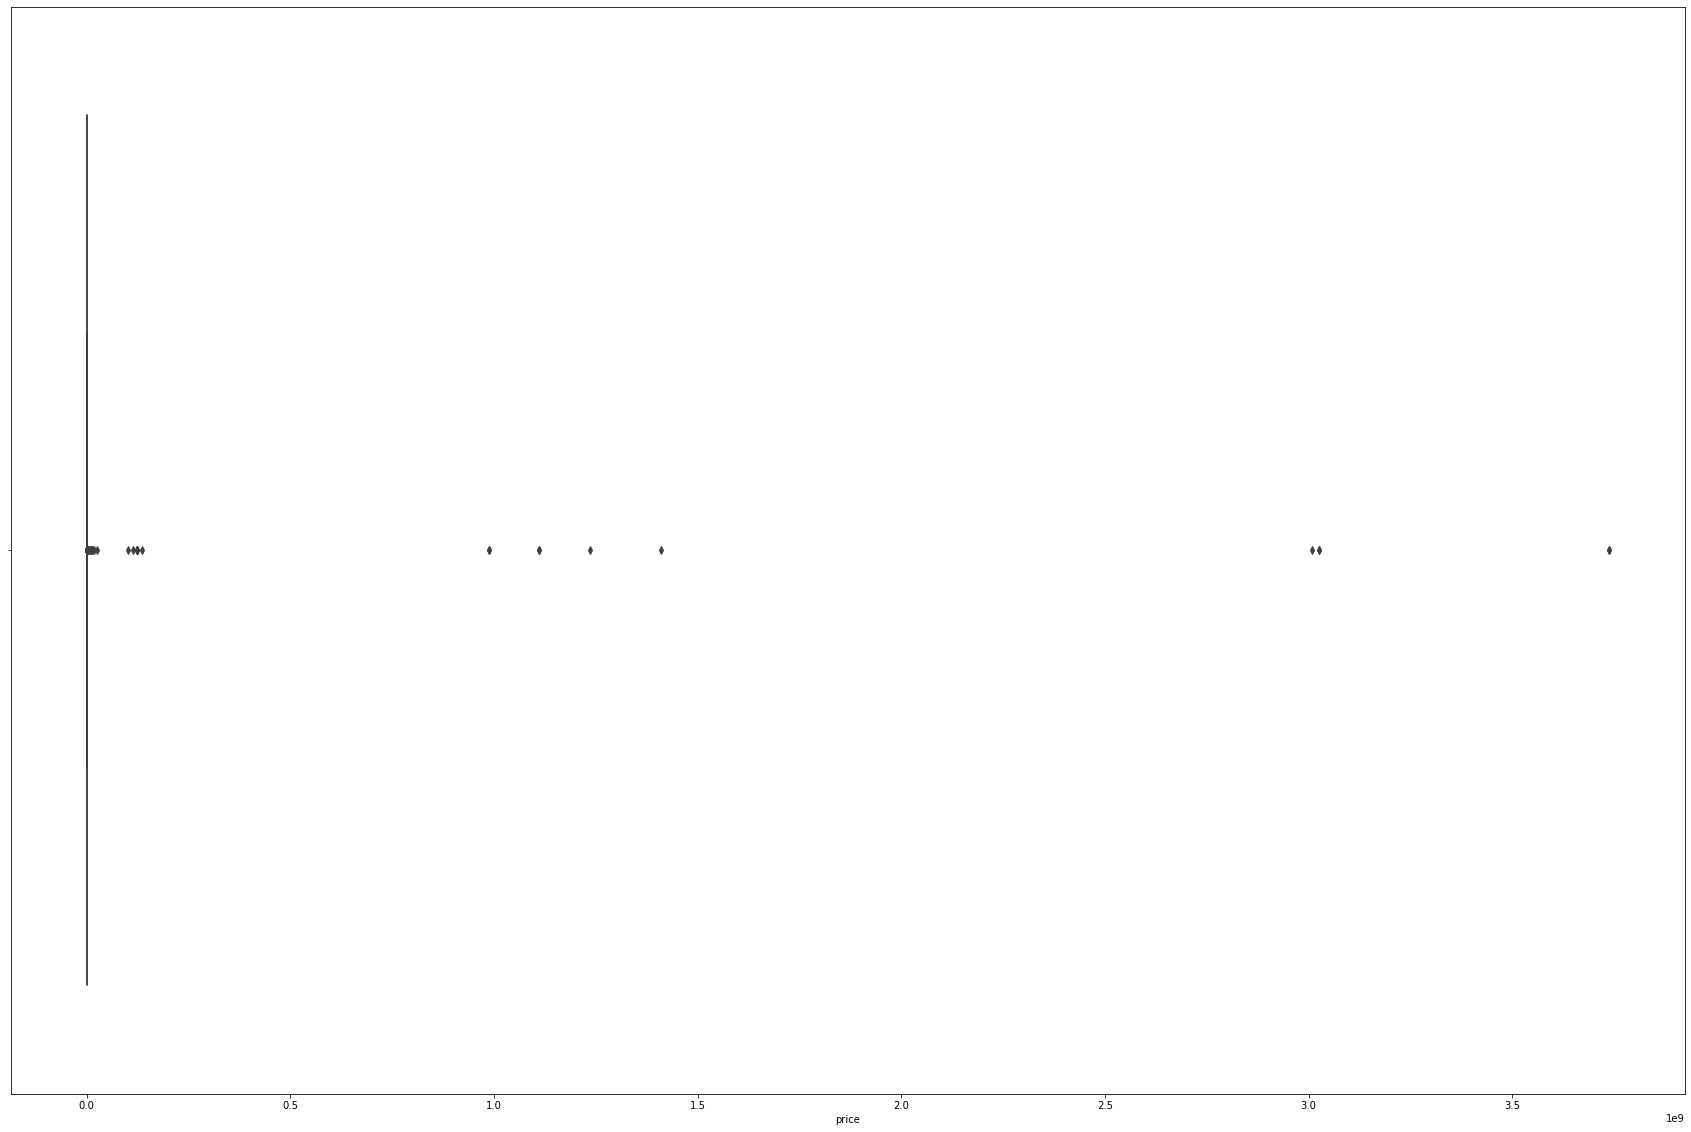

In [103]:
# Looks at price data to understand its distribution
# Apply lamba to display data in non-scientific notation for easy readability
df1['price'].apply(lambda x: '%.5f' % x)

# Boxplot showing price range
sns.boxplot(x= df1['price'] )

# Describe price characterictics
df1['price'].describe().astype(str)

### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

<AxesSubplot:xlabel='price'>

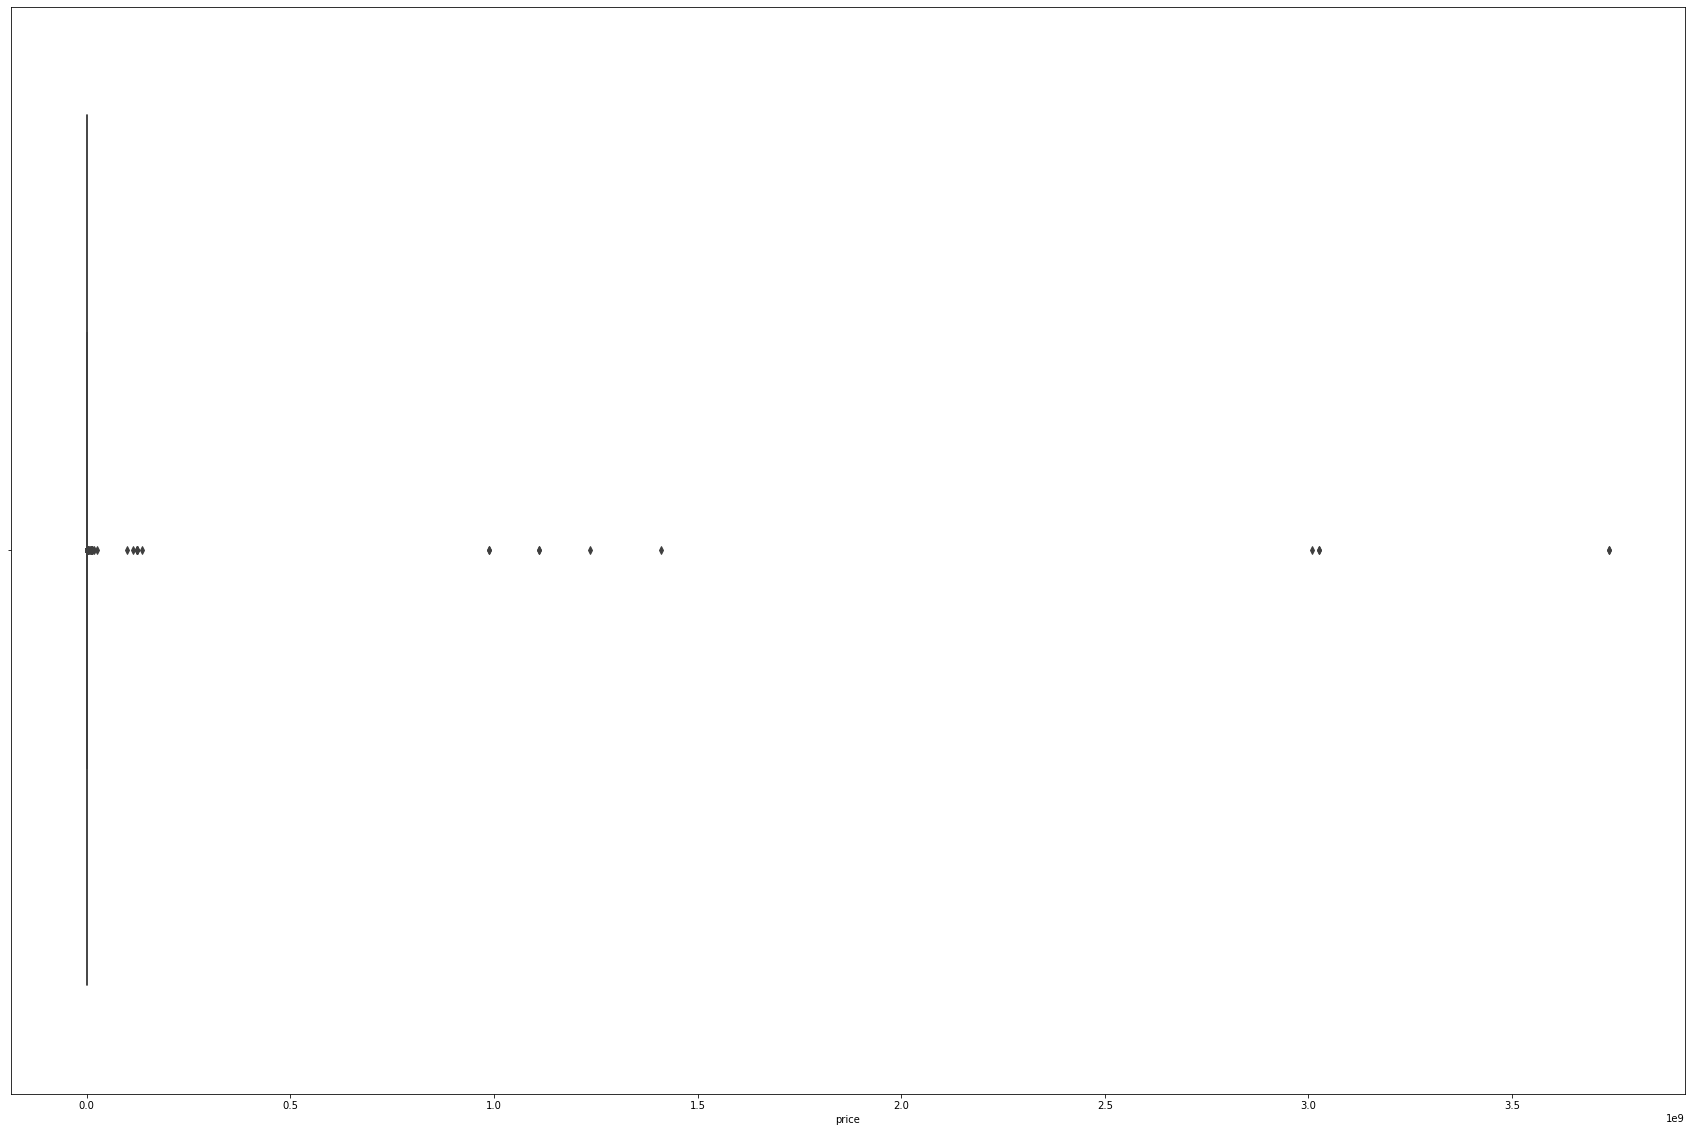

In [104]:
df1_highprice = df1[(df1['price']>50000)]
df1_highprice['price'].apply(lambda x: '%.5f' % x)

df1_highprice['price'].describe().astype(str)
sns.boxplot( x=df1_highprice['price'] )


<AxesSubplot:xlabel='price'>

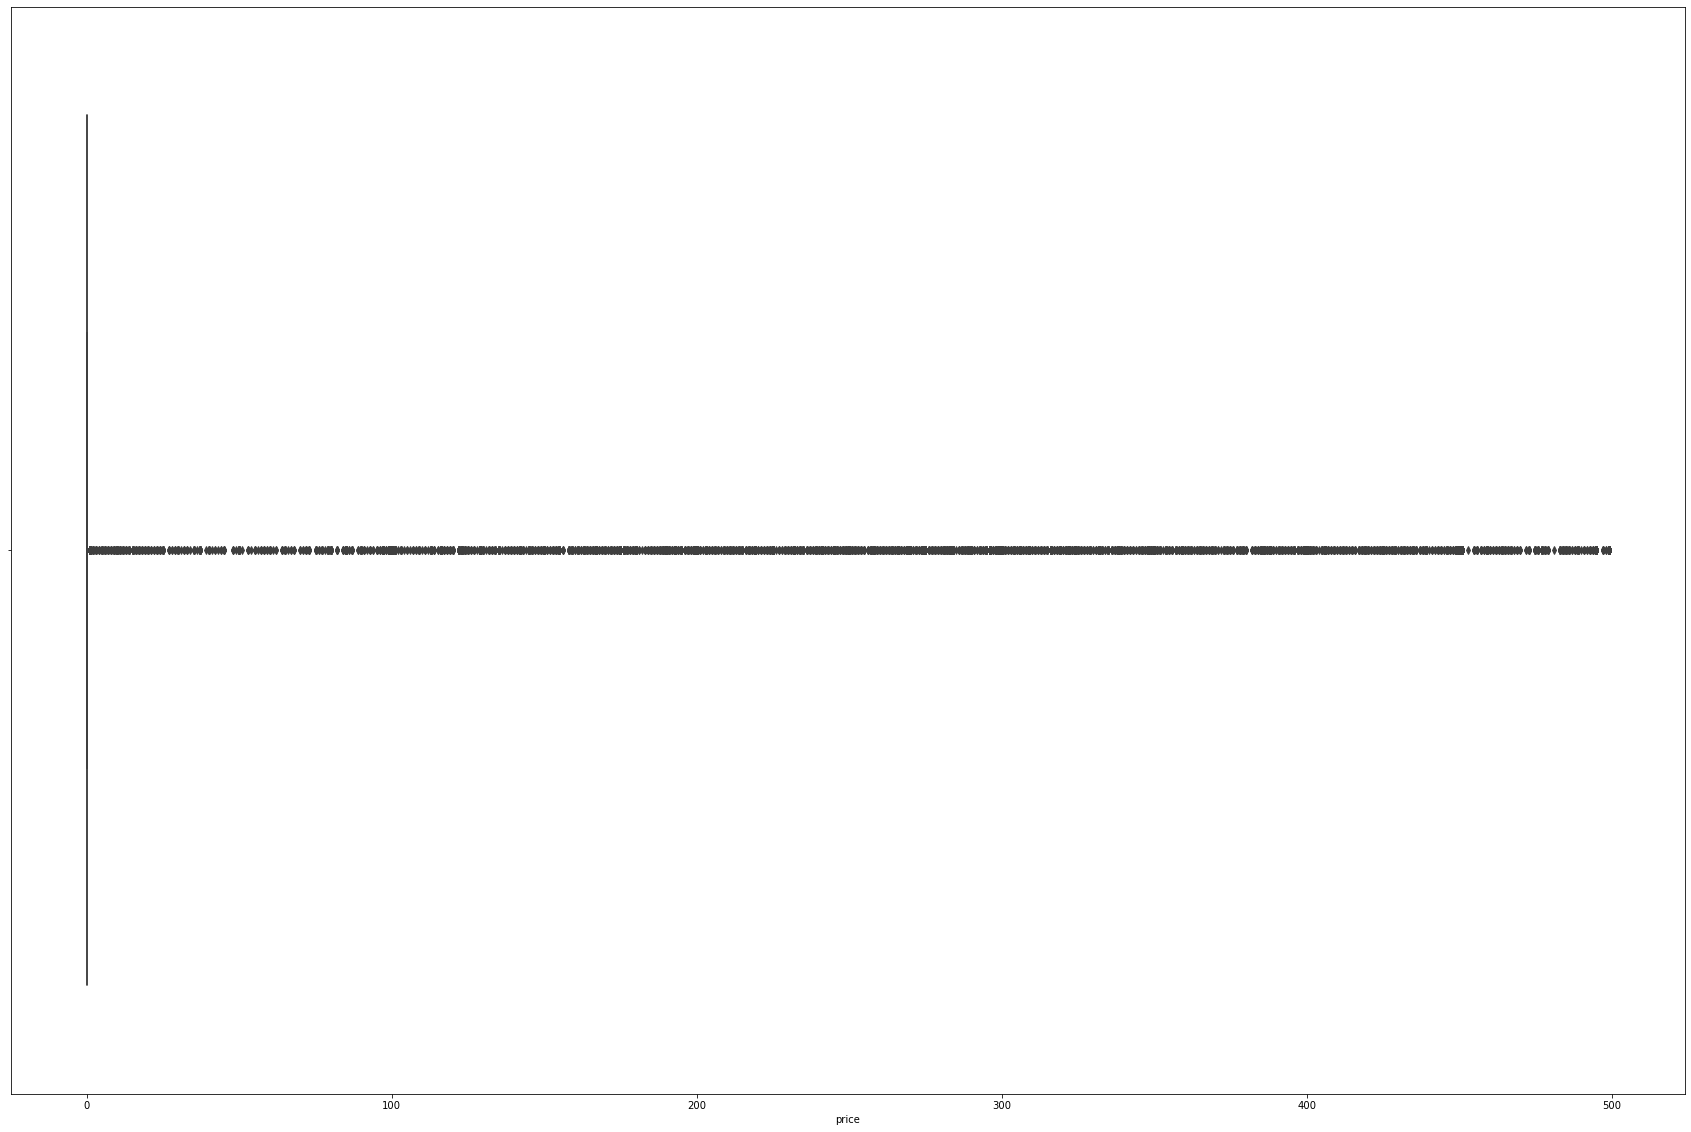

In [105]:
df1_lowprice = df1[(df1['price']<500)]
df1_lowprice['price'].describe().astype(str)
sns.boxplot( x=df1_lowprice['price'] )


In [106]:
# Since Price data is all over the place, we should restrict our analysis to a subset of cars in range 
# of $500-$50000

df1 = df1[(df1['price']>500) & (df1['price']<50000)]
df1['price'].describe().astype(str)

count              370724.0
mean      17746.85813974817
std      12002.345018007054
min                   501.0
25%                  7500.0
50%                 14999.0
75%                 26590.0
max                 49999.0
Name: price, dtype: object

We will drop 3.2941341829085458 % of samples since there are lot of outliers


<AxesSubplot:xlabel='price'>

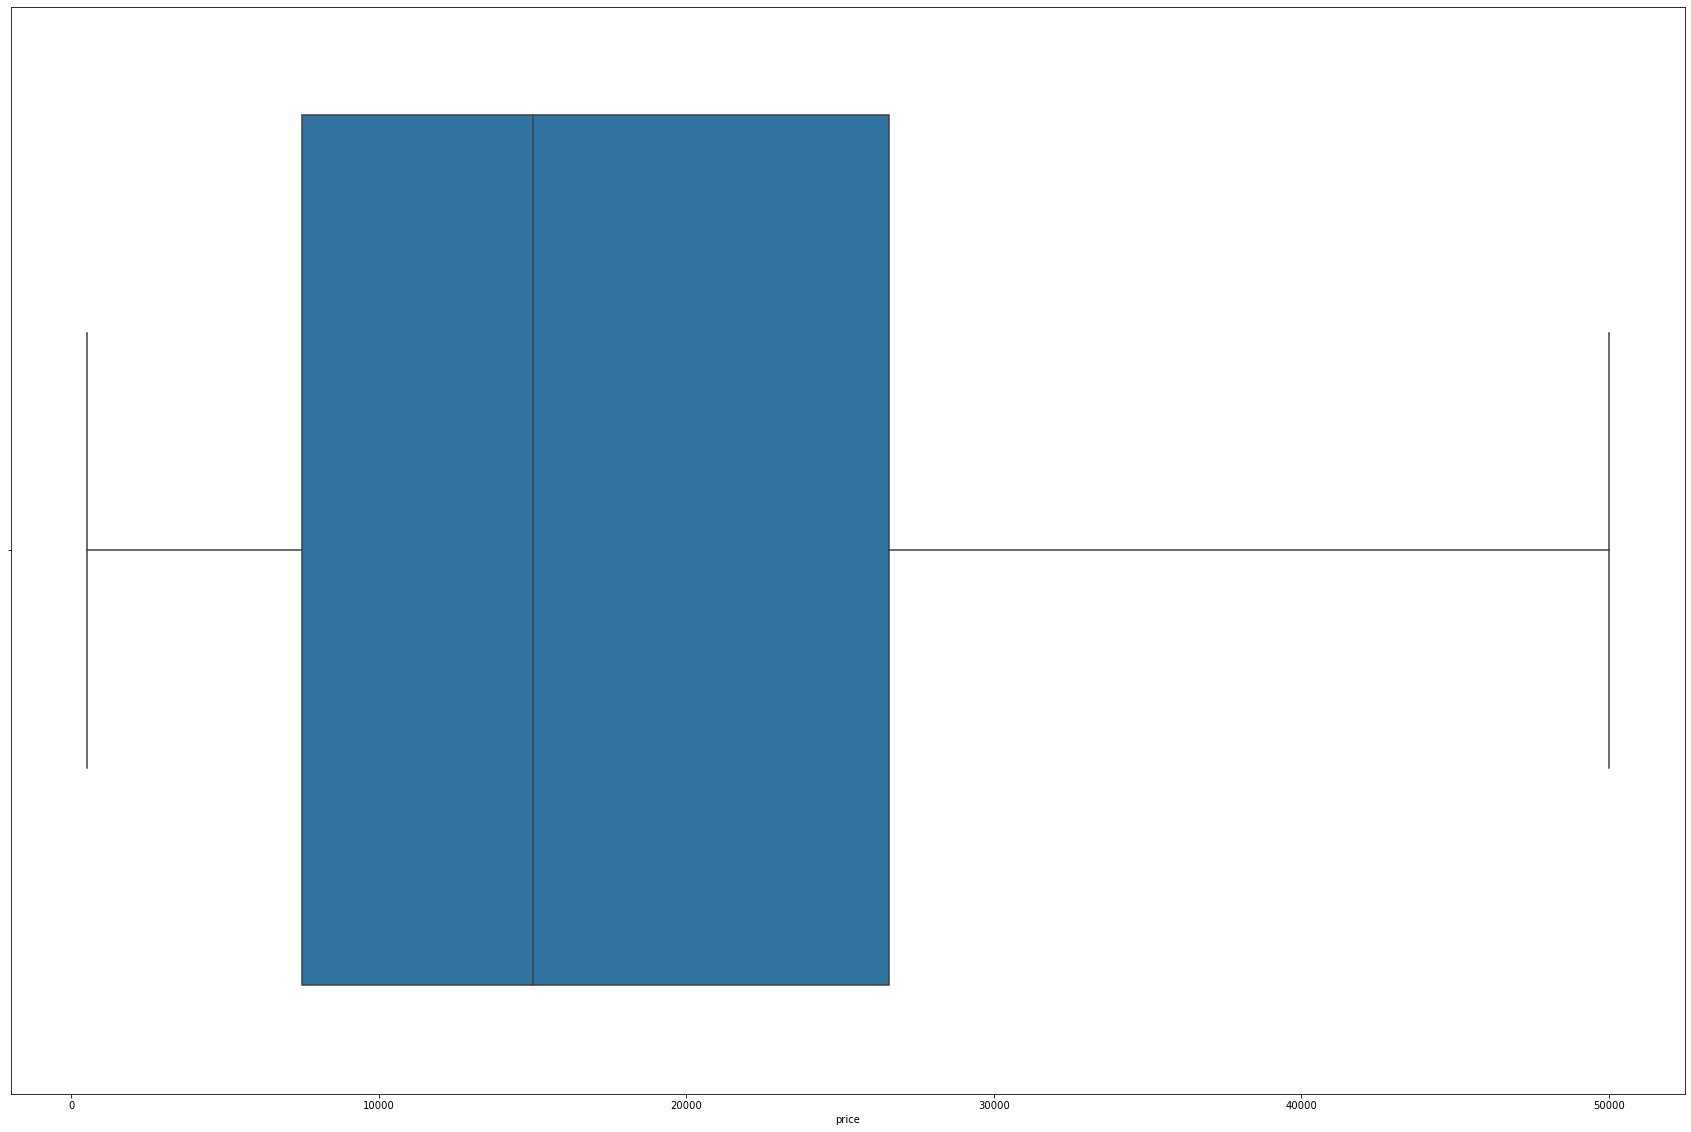

In [107]:
# The goal here is just to solve the noise first.
# We still have outliers, but they might be more managable

print("We will drop", ((426880-370724-42094)/426880)*100, "% of samples since there are lot of outliers")
sns.boxplot( x=df1['price'] )



In [108]:

df1.shape

(370724, 18)

In [12]:
df1.isna().sum()


id                   0
region               0
price                0
year               863
manufacturer     14146
model             4045
condition       136790
cylinders       150132
fuel              2509
odometer          2009
title_status      6667
transmission      1730
VIN             144685
drive           113470
size            265007
type             79520
paint_color     106731
state                0
dtype: int64

In [13]:
# --> year

# The first variable that has an empty value is "year".
df1.dropna(subset=['year'], how='all', inplace=True)
df1.isna().sum()


id                   0
region               0
price                0
year                 0
manufacturer     13284
model             3984
condition       135927
cylinders       150065
fuel              2283
odometer          1947
title_status      6445
transmission      1669
VIN             144624
drive           113207
size            264144
type             79366
paint_color     106612
state                0
dtype: int64

In [14]:
print ("Unique no. of years", df1.year.nunique())
print ("Unique no. of manufacturer", df1.manufacturer.nunique())
print ("Unique no. of model", df1.model.nunique())
print ("Unique no. of condition", df1.condition.nunique())
print ("Unique no. of cylinders", df1.cylinders.nunique())
print ("Unique no. of fuel", df1.fuel.nunique())
print ("Unique no. of title_status", df1.title_status.nunique())
print ("Unique no. of transmission", df1.transmission.nunique())
print ("Unique no. of drive", df1.drive.nunique())
print ("Unique no. of type", df1.type.nunique())
print ("Unique no. of paint_bolor", df1.paint_color.nunique())

Unique no. of years 112
Unique no. of manufacturer 42
Unique no. of model 26175
Unique no. of condition 6
Unique no. of cylinders 8
Unique no. of fuel 5
Unique no. of title_status 6
Unique no. of transmission 3
Unique no. of drive 3
Unique no. of type 13
Unique no. of paint_bolor 12


In [15]:
print ("Unique year", df1.year.unique())


Unique year [2014. 2010. 2020. 2017. 2013. 2012. 2016. 2019. 2011. 1992. 2018. 2004.
 2015. 2001. 2006. 1968. 2003. 2008. 2007. 2005. 1966. 2009. 1998. 2002.
 1999. 2021. 1997. 1976. 1969. 1995. 1978. 1954. 1979. 1970. 1974. 1996.
 1987. 2000. 1955. 1991. 1972. 1988. 1994. 1929. 1984. 1986. 1989. 1973.
 1946. 1958. 1937. 1985. 1957. 1953. 1942. 1963. 1977. 1993. 1990. 1965.
 1982. 1948. 1983. 1936. 1932. 1951. 1931. 1980. 1967. 1971. 1947. 1981.
 1926. 1962. 1975. 1964. 1933. 1934. 1952. 1940. 1959. 1950. 1930. 1960.
 1922. 1928. 2022. 1901. 1941. 1956. 1924. 1927. 1939. 1923. 1949. 1961.
 1935. 1918. 1938. 1900. 1916. 1943. 1925. 1921. 1915. 1945. 1905. 1920.
 1944. 1913. 1910. 1909.]


In [16]:
print ("Unique models", df1.manufacturer.unique())

Unique models ['gmc' 'chevrolet' 'toyota' 'ford' 'jeep' 'nissan' 'ram' 'mazda'
 'cadillac' 'honda' 'dodge' 'lexus' 'jaguar' 'buick' 'chrysler' 'volvo'
 'audi' 'infiniti' 'lincoln' 'alfa-romeo' 'subaru' nan 'acura' 'hyundai'
 'mercedes-benz' 'bmw' 'mitsubishi' 'volkswagen' 'porsche' 'kia' 'rover'
 'mini' 'pontiac' 'fiat' 'tesla' 'mercury' 'saturn' 'harley-davidson'
 'datsun' 'aston-martin' 'land rover' 'morgan' 'ferrari']


In [17]:
# Noticed that "model" columns have info that can help me fill in the "manufacturer" column.
# Using some lookups from the "model" column to fill in the "manufacturer" column.

# First I will apply a lower function in the "model" column.
df1['model'] = df1['model'].str.lower() 


# In the first cicle I will drop rows that have 'model' and 'manufacturer' with nan values at the same time.
print("Before dropping the rows with NaN Model",df1.model.isna().sum()," & Manafacturer is ",df1.manufacturer.isna().sum())
df1.drop( index=df1[df1['manufacturer'].isna() & df1['model'].isna()].index, inplace=True )
print("After dropping the rows with NaN Model",df1.model.isna().sum()," & Manafacturer is ",df1.manufacturer.isna().sum())

# Now I will create a dictionary with the model and its respective manufacturer.
df11 = df1[df1['manufacturer'].notna()]
df12 = df11[df11['model'].notna()]
manufacturer_dict = {}
for k, v in df12[['model', 'manufacturer']].values:
    manufacturer_dict[k] = v
df1['manufacturer'] = df1.apply( lambda x: manufacturer_dict[x['model']] if x['model'] in manufacturer_dict.keys() else x['manufacturer'], axis=1) # reduce the "nan" values to 17848, but not resolved.

print("After doing dictionary lookup in models with NaN",df1.manufacturer.isna().sum())

# The third and last attempt I will see the values in "model" columns and find a relationtionship between "manufacturer" and "model".
df1['manufacturer'] = df1.apply( lambda x: x['manufacturer'] if pd.isna( x['model'] ) or pd.notna( x['manufacturer'] )
                                # Map some popular GMC models 
                                else 'gmc' if 'hummer' in str(x['model']).split() 
                                else 'gmc' if 'impala' in str(x['model']).split() 
                                else 'gmc' if 'saab' in str(x['model']).split() 
                                else 'gmc' if 'janesville' in str(x['model']).split()
                                else 'gmc' if 'caddilac' in str(x['model']).split()
                                else 'gmc' if 'pontiac' in str(x['model']).split()
                                else 'gmc' if 'oldsmobile' in str(x['model']).split()
                                else 'gmc' if 'gm' in str(x['model']).split()
                                else 'gmc' if 'sierra' in str(x['model']).split()
                                else 'gmc' if 'gmc' in str(x['model']).split()
                                # Map some popular Ford models 
                                else 'ford' if 'f-150' in str(x['model']).split() 
                                else 'ford' if 'fusion' in str(x['model']).split()
                                else 'ford' if 'focus' in str(x['model']).split() 
                                else 'ford' if 'escape' in str(x['model']).split()
                                else 'ford' if 'explorer' in str(x['model']).split()
                                else 'ford' if 'mustang' in str(x['model']).split() 
                                else 'ford' if 'fiesta' in str(x['model']).split()  
                                # Map some popular Honda models 
                                else 'honda' if 'accord' in str(x['model']).split()
                                else 'honda' if 'civic' in str(x['model']).split()
                                else 'honda' if 'fit' in str(x['model']).split()
                                else 'honda' if 'crv' in str(x['model']).split()
                                else 'honda' if 'odyssey' in str(x['model']).split()
                                else 'honda' if 'cr-v' in str(x['model']).split()
                                # Map some popular Toyota models 
                                else 'toyota' if 'hino' in str(x['model']).split()
                                else 'toyota' if 'camry' in str(x['model']).split()
                                else 'toyota' if 'corolla' in str(x['model']).split()
                                else 'toyota' if 'prius' in str(x['model']).split()
                                else 'toyota' if 'sienna' in str(x['model']).split()
                                else 'toyota' if 'rav4' in str(x['model']).split()
                                else 'toyota' if 'highlander' in str(x['model']).split()
                                # Map some popular Volkswagen models 
                                else 'volkswagen' if 'porsche' in str(x['model']).split() 
                                else 'volkswagen' if 'jetta' in str(x['model']).split()
                                # Map some popular Nissan models 
                                else 'nissan' if 'altima' in str(x['model']).split()
                                else 'nissan' if 'maxima' in str(x['model']).split()
                                else 'nissan' if 'sentra' in str(x['model']).split()
                                else 'nissan' if 'rogue' in str(x['model']).split()
                                else 'nissan' if 'pathfinder' in str(x['model']).split()                                else 'nissan' if 'altima' in str(x['model']).split()
                                else 'nissan' if 'leaf' in str(x['model']).split()
                                # Map some popular Chevrolet models 
                                else 'chevrolet' if 'corvette' in str(x['model']).split()
                                else 'chevrolet' if 'tahoe' in str(x['model']).split()
                                else 'chevrolet' if 'malibu' in str(x['model']).split()
                                else 'chevrolet' if 'suburban' in str(x['model']).split()
                                else 'chevrolet' if 'cheverolet' in str(x['model']).split()
                                else 'chevrolet' if 'bolt' in str(x['model']).split()
                                else 'chevrolet' if 'camaro' in str(x['model']).split()
                                else 'chevrolet' if 'colorado' in str(x['model']).split()
                                else 'chevrolet' if 'silverado' in str(x['model']).split()
                                else 'chevrolet' if 'equinox' in str(x['model']).split()
                                # Map some popular Hyundai models
                                else 'hyundau' if 'hyunday' in str(x['model']).split()
                                else 'hyundau' if 'hyundai' in str(x['model']).split()
                                else 'hyundau' if 'accent' in str(x['model']).split()
                                else 'hyundau' if 'elantra' in str(x['model']).split()
                                else 'hyundau' if 'sonata' in str(x['model']).split()
                                # Map some popular Subaru models
                                else 'subaru' if 'impreza' in str(x['model']).split()
                                else 'subaru' if 'legacy' in str(x['model']).split()
                                else 'subaru' if 'outback' in str(x['model']).split()
                                else 'subaru' if 'wrx' in str(x['model']).split()
                                else 'subaru' if 'crosstrek' in str(x['model']).split()
                                # Map some popular JEEP models
                                else 'jeep' if 'cherokee' in str(x['model']).split()
                                else 'jeep' if 'compass' in str(x['model']).split()
                                else 'jeep' if 'wrangler' in str(x['model']).split()
                                # Map some popular chrysler models
                                else 'chrysler' if 'plymouth' in str(x['model']).split()
                                else 'chrysler' if 'chrystler' in str(x['model']).split()
                                else 'chrysler' if 'pacifica' in str(x['model']).split()
                                else 'chrysler' if 'maserati' in str(x['model']).split()
                                # Map some popular BMW models
                                else 'bmw' if 'triumph' in str(x['model']).split()
                                else 'bmw' if '540i' in str(x['model']).split()
                                else 'bmw' if 'x5' in str(x['model']).split()
                                else 'bmw' if 'i3' in str(x['model']).split()
                                else 'bmw' if 'bmw' in str(x['model']).split()
                                # Map some popular Mercedes models                                
                                else 'mercedes' if 'mercedes-benz' in str(x['model']).split()
                                else 'mercedes' if 'mercedes' in str(x['model']).split()
                                else 'mercedes' if 'benz' in str(x['model']).split()
                                else 'mercedes' if 'gle' in str(x['model']).split()
                                # Map some popular volkswagen models                                
                                else 'volkswagen' if 'bentley' in str(x['model']).split()
                                else 'volkswagen' if 'lamborghini' in str(x['model']).split()
                                else 'volkswagen' if 'volkswagen' in str(x['model']).split()
                                else 'volkswagen' if 'jetta' in str(x['model']).split()
                                # Map some popular Dodge models
                                else 'dodge' if 'challenger' in str(x['model']).split()
                                else 'dodge' if 'journey' in str(x['model']).split()
                                else 'dodge' if 'grand' in str(x['model']).split()
                                else 'dodge' if 'dodge' in str(x['model']).split()
                                
                               # Map models based on company name
                                else 'mazda' if 'mazda' in str(x['model']).split() 
                                else 'isuzu' if 'isuzu' in str(x['model']).split() 
                                else 'saab' if 'saab' in str(x['model']).split() 
                                else 'suzuki' if 'suzuki' in str(x['model']).split() 
                                else 'scion' if 'scion' in str(x['model']).split() 
                                else 'smart' if 'smart' in str(x['model']).split()
                                else 'audi' if 'audi' in str(x['model']).split() 
                                else 'infiniti' if 'infiniti' in str(x['model']).split() 
                                else 'lincoln' if 'lincoln' in str(x['model']).split() 
                                else 'alfa-romeo' if 'alfa-romeo' in str(x['model']).split() 
                                else 'mitsubishi' if 'mitsubishi' in str(x['model']).split() 
                                else 'kia' if 'kia' in str(x['model']).split()
                                else 'rover' if 'rover' in str(x['model']).split() 
                                else 'mini' if 'mini' in str(x['model']).split() 
                                else 'saab' if 'saab' in str(x['model']).split() 
                                else 'pontiac' if 'pontiac' in str(x['model']).split() 
                                else 'fiat' if 'fiat' in str(x['model']).split() 
                                else 'tesla' if 'tesla' in str(x['model']).split()
                                else 'mercury' if 'mercury' in str(x['model']).split() 
                                else 'infiniti' if 'infiniti' in str(x['model']).split() 
                                else 'saturn' if 'saturn' in str(x['model']).split() 
                                else 'ferrari' if 'ferrari' in str(x['model']).split() 
    
                                else x['manufacturer'], axis=1 ) # reduce the "nan" values to 6554, but not resolved

# --> condition

print("After doing lambda lookup in models with NaN",df1.manufacturer.isna().sum())


Before dropping the rows with NaN Model 3984  & Manafacturer is  13284
After dropping the rows with NaN Model 3984  & Manafacturer is  13284
After doing dictionary lookup in models with NaN 11662
After doing lambda lookup in models with NaN 6525


In [18]:
# --> condition

print("Before doing dictionary lookup in condition with NaN",df1['condition'].isna().sum())

# Check if you have a model with the "condition" filled in that can help us complete the "nan" values that have the same model.
df11 = df1[df1['condition'].notna()]
df12 = df11[df11['model'].notna()]
condition_dict = {}
for k, v in df12[['model', 'condition']].values:
    condition_dict[k] = v
df1['condition'] = df1.apply( lambda x: x['condition'] if pd.isna( x['model'] ) or pd.notna( x['condition'] ) else condition_dict[x['model']] if x['model'] in condition_dict.keys() else x['condition'], axis=1)# 28615 "nan" values left.
# as it can cause confusion between the "like new" and "new" values I will not try to fill in the "nan" values using the ifo's in the "description" variable.

print("After doing dictionary lookup in models & condition with NaN",df1['condition'] .isna().sum())

df1['condition'].describe()


Before doing dictionary lookup in condition with NaN 135927
After doing dictionary lookup in models & condition with NaN 17860


count        352001
unique            6
top       excellent
freq         152626
Name: condition, dtype: object

In [19]:
# --> cylinders
print("Before doing dictionary lookup in models & cylinders with NaN",df1['cylinders'].isna().sum())

# Check if you have a model with the "cylinders" filled in that can help us complete the "nan" values that have the same model.
df11 = df1[df1['cylinders'].notna()]
df12 = df11[df11['model'].notna()]
cylinders_dict = {}
for k, v in df12[['model', 'cylinders']].values:
    cylinders_dict[k] = v
df1['cylinders'] = df1.apply( lambda x: x['cylinders'] if pd.isna( x['model'] ) or pd.notna( x['cylinders'] ) else cylinders_dict[x['model']] if x['model'] in cylinders_dict.keys() else x['cylinders'], axis=1)# 29022 "nan" values remain.
# Since the values inside the "cylinders" variable have space between them, they can cause errors in filling in the "nan" values using the "split" function.
print("After doing dictionary lookup in models & cylinders with NaN",df1['cylinders'].isna().sum())
df1['cylinders'].describe()


Before doing dictionary lookup in models & cylinders with NaN 150065
After doing dictionary lookup in models & cylinders with NaN 34759


count          335102
unique              8
top       6 cylinders
freq           121640
Name: cylinders, dtype: object

In [20]:
# --> odometer
print("Before doing estimations odometer readings with NaN",df1['odometer'].isna().sum())

# Trying to stipulate the value as close to reality as possible, I will fill in the "nan" values by separating this variable by the "year" column and calculating the median to try to prevent the value from being affected by possible outliers.
df1['odometer'] = df1['odometer'].fillna(df1.groupby('year')['odometer'].transform('median'))

print("After doing estimations odometer readings with NaN",df1['odometer'].isna().sum())


Before doing estimations odometer readings with NaN 1947
After doing estimations odometer readings with NaN 0


In [21]:
print ("Unique title_status from original dataset", df1.title_status.unique())

# Since the values of this variable are difficult to identify effectively through queries to other columns and the total "nan" values are low, I will directly fill in the "nan" values with "other".
df1['title_status'].fillna( 'other', inplace=True )

print ("Unique title_status after transform", df1.title_status.unique())



Unique title_status from original dataset ['clean' 'rebuilt' 'lien' nan 'salvage' 'missing' 'parts only']
Unique title_status after transform ['clean' 'rebuilt' 'lien' 'other' 'salvage' 'missing' 'parts only']


In [22]:
# --> transmission

# As it can happen that the same car model has several transmission possibilities, I will not use the search formula in the variable "model".
# Check and there is the value of "transmission" inside the variable "description". In order not to cause an error in filling in the "nan" values, I will not use the "other" value.

print("****************transmission**********************************************************")

print("Before doing estimations transmission with NaN",df1['transmission'].isna().sum())
print ("Unique transmission before transform", df1.transmission.unique())

df1['transmission'].fillna( 'other', inplace=True )

print ("Unique transmission after transform", df1.transmission.unique())
print("After doing estimations transmission with NaN",df1['transmission'].isna().sum())

# --> drive
print("***********************drive***************************************************")

print("Before doing estimations drive with NaN",df1['drive'].isna().sum())
print ("Unique drive before transform", df1.drive.unique())

# Put most commonly drive type for NaN values
df1['drive'].fillna( 'fwd', inplace=True )


print("After doing estimations drive with NaN",df1['drive'].isna().sum())
print ("Unique drive after transform", df1.drive.unique())

print("**************************size***********************************************")

# --> size
print("Before doing estimations size with NaN",df1['size'].isna().sum())
print ("Unique size before transform",df1['size'].unique())

# Check if you have a model with the "size" filled in that can help us complete the "nan" values that have the same model.
df1['drive'].fillna( 'other', inplace=True )


print("After doing estimations size with NaN",df1['size'].isna().sum())
print ("Unique size after transform", df1['size'].unique())

#

print("**************************type***********************************************")

# --> type
print("Before doing estimations type with NaN",df1['type'].isna().sum())
print ("Unique type before transform",df1['type'].unique())

# Check if you have a model with the "type" filled in that can help us complete the "nan" values that have the same model.
df1['type'].fillna( 'other', inplace=True )
df1['type'] = df1['type'].str.lower()
# --> type
print("After doing estimations type with NaN",df1['type'].isna().sum())
print ("Unique type before transform",df1['type'].unique())

print("**************************paint_color***********************************************")
print("Before doing estimations paint_color with NaN",df1['paint_color'].isna().sum())
print ("Unique paint_color before transform",df1['paint_color'].unique())


# --> paint-color

# As it can happen that the same car model has several possibilities of "paint-color" I will not use the search formula in the variable "model".
# Check and there is the value of "paint-color" inside the variable "description".
df1['paint_color'].fillna( 'other', inplace=True )


print("After doing estimations paint_color with NaN",df1['paint_color'].isna().sum())
print ("Unique paint_color after transform",df1['paint_color'].unique())

****************transmission**********************************************************
Before doing estimations transmission with NaN 1669
Unique transmission before transform ['other' 'automatic' 'manual' nan]
Unique transmission after transform ['other' 'automatic' 'manual']
After doing estimations transmission with NaN 0
***********************drive***************************************************
Before doing estimations drive with NaN 113207
Unique drive before transform [nan 'rwd' '4wd' 'fwd']
After doing estimations drive with NaN 0
Unique drive after transform ['fwd' 'rwd' '4wd']
**************************size***********************************************
Before doing estimations size with NaN 264144
Unique size before transform [nan 'full-size' 'mid-size' 'compact' 'sub-compact']
After doing estimations size with NaN 264144
Unique size after transform [nan 'full-size' 'mid-size' 'compact' 'sub-compact']
**************************type*****************************************

In [23]:
# --> id

# This variable is not relevant to the project. So I will not deal with your "nan" values and I will drop this column.
df1.drop( ['id'], axis=1, inplace=True )


In [24]:
# That column has a lot of polluted data and it would take months of work to try to correct it one by one. As I have a lot of variables with good potentials in this dataset I will choose to drop this column. 
# If the model does not perform well in the end, in the next cycles I will study the possibility of treating this column better.
# I think it is worse for the project to delete only the nan rows, but keeping the column, than to delete the entire column and not decrease the number of observations in our dataset.
df1.drop( ['model'], axis=1, inplace=True )

In [25]:
# --> vin

# This variable is not relevant to the project. So I will not deal with your "nan" values and I will drop this column.
df1.drop( ['VIN'], axis=1, inplace=True )


In [26]:
df1.isna().sum()

region               0
price                0
year                 0
manufacturer      6525
condition        17860
cylinders        34759
fuel              2283
odometer             0
title_status         0
transmission         0
drive                0
size            264144
type                 0
paint_color          0
state                0
dtype: int64

In [27]:
# In this first cycle, as I have a lot of data, I will choose to remove from the dataset all observations that have null values. 
# Depending on the model's performance at the end of this project, I will think of other ways to treat them from the second cycle.
df1.dropna(inplace=True)

In [28]:
df1.dtypes

region           object
price             int64
year            float64
manufacturer     object
condition        object
cylinders        object
fuel             object
odometer        float64
title_status     object
transmission     object
drive            object
size             object
type             object
paint_color      object
state            object
dtype: object

In [29]:
# year
df1['year'] = df1['year'].astype( 'int64' )

In [30]:
num_attributes = df1.select_dtypes( include=['int64', 'float64'] )
cat_attributes = df1.select_dtypes( exclude=['int64', 'float64'] )

In [31]:
num_attributes.sample()


,price,year,odometer
276386,18495,2017,36325.0


In [32]:
cat_attributes.sample()


,region,manufacturer,condition,cylinders,fuel,title_status,transmission,drive,size,type,paint_color,state
98520,jacksonville,honda,excellent,4 cylinders,gas,clean,automatic,fwd,compact,sedan,grey,fl


In [33]:
# Central Tendency - mean, median
ct1 = pd.DataFrame( num_attributes.apply( np.mean ) ).T
ct2 = pd.DataFrame( num_attributes.apply( np.median ) ).T

# Dispersion - std, min, max, range, skew, kurtosis
d1 = pd.DataFrame( num_attributes.apply( np.std ) ).T
d2 = pd.DataFrame( num_attributes.apply( min ) ).T
d3 = pd.DataFrame( num_attributes.apply( max ) ).T
d4 = pd.DataFrame( num_attributes.apply( lambda x: x.max() - x.min() ) ).T
d5 = pd.DataFrame( num_attributes.apply( lambda x: x.skew() ) ).T
d6 = pd.DataFrame( num_attributes.apply( lambda x: x.kurtosis() ) ).T

# concatenate
m = pd.concat( [d2, d3, d4, ct1, ct2, d1, d5, d6] ).T.reset_index()
m.columns = ( ['attributes', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis'])
m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,price,550.0,49999.0,49449.0,13730.765766,10500.0,10369.974082,1.160833,0.811868
1,year,1900.0,2022.0,122.0,2008.604686,2011.0,10.149938,-3.151572,14.953399
2,odometer,0.0,10000000.0,10000000.0,120738.266414,111000.0,213426.041362,38.585424,1731.089757


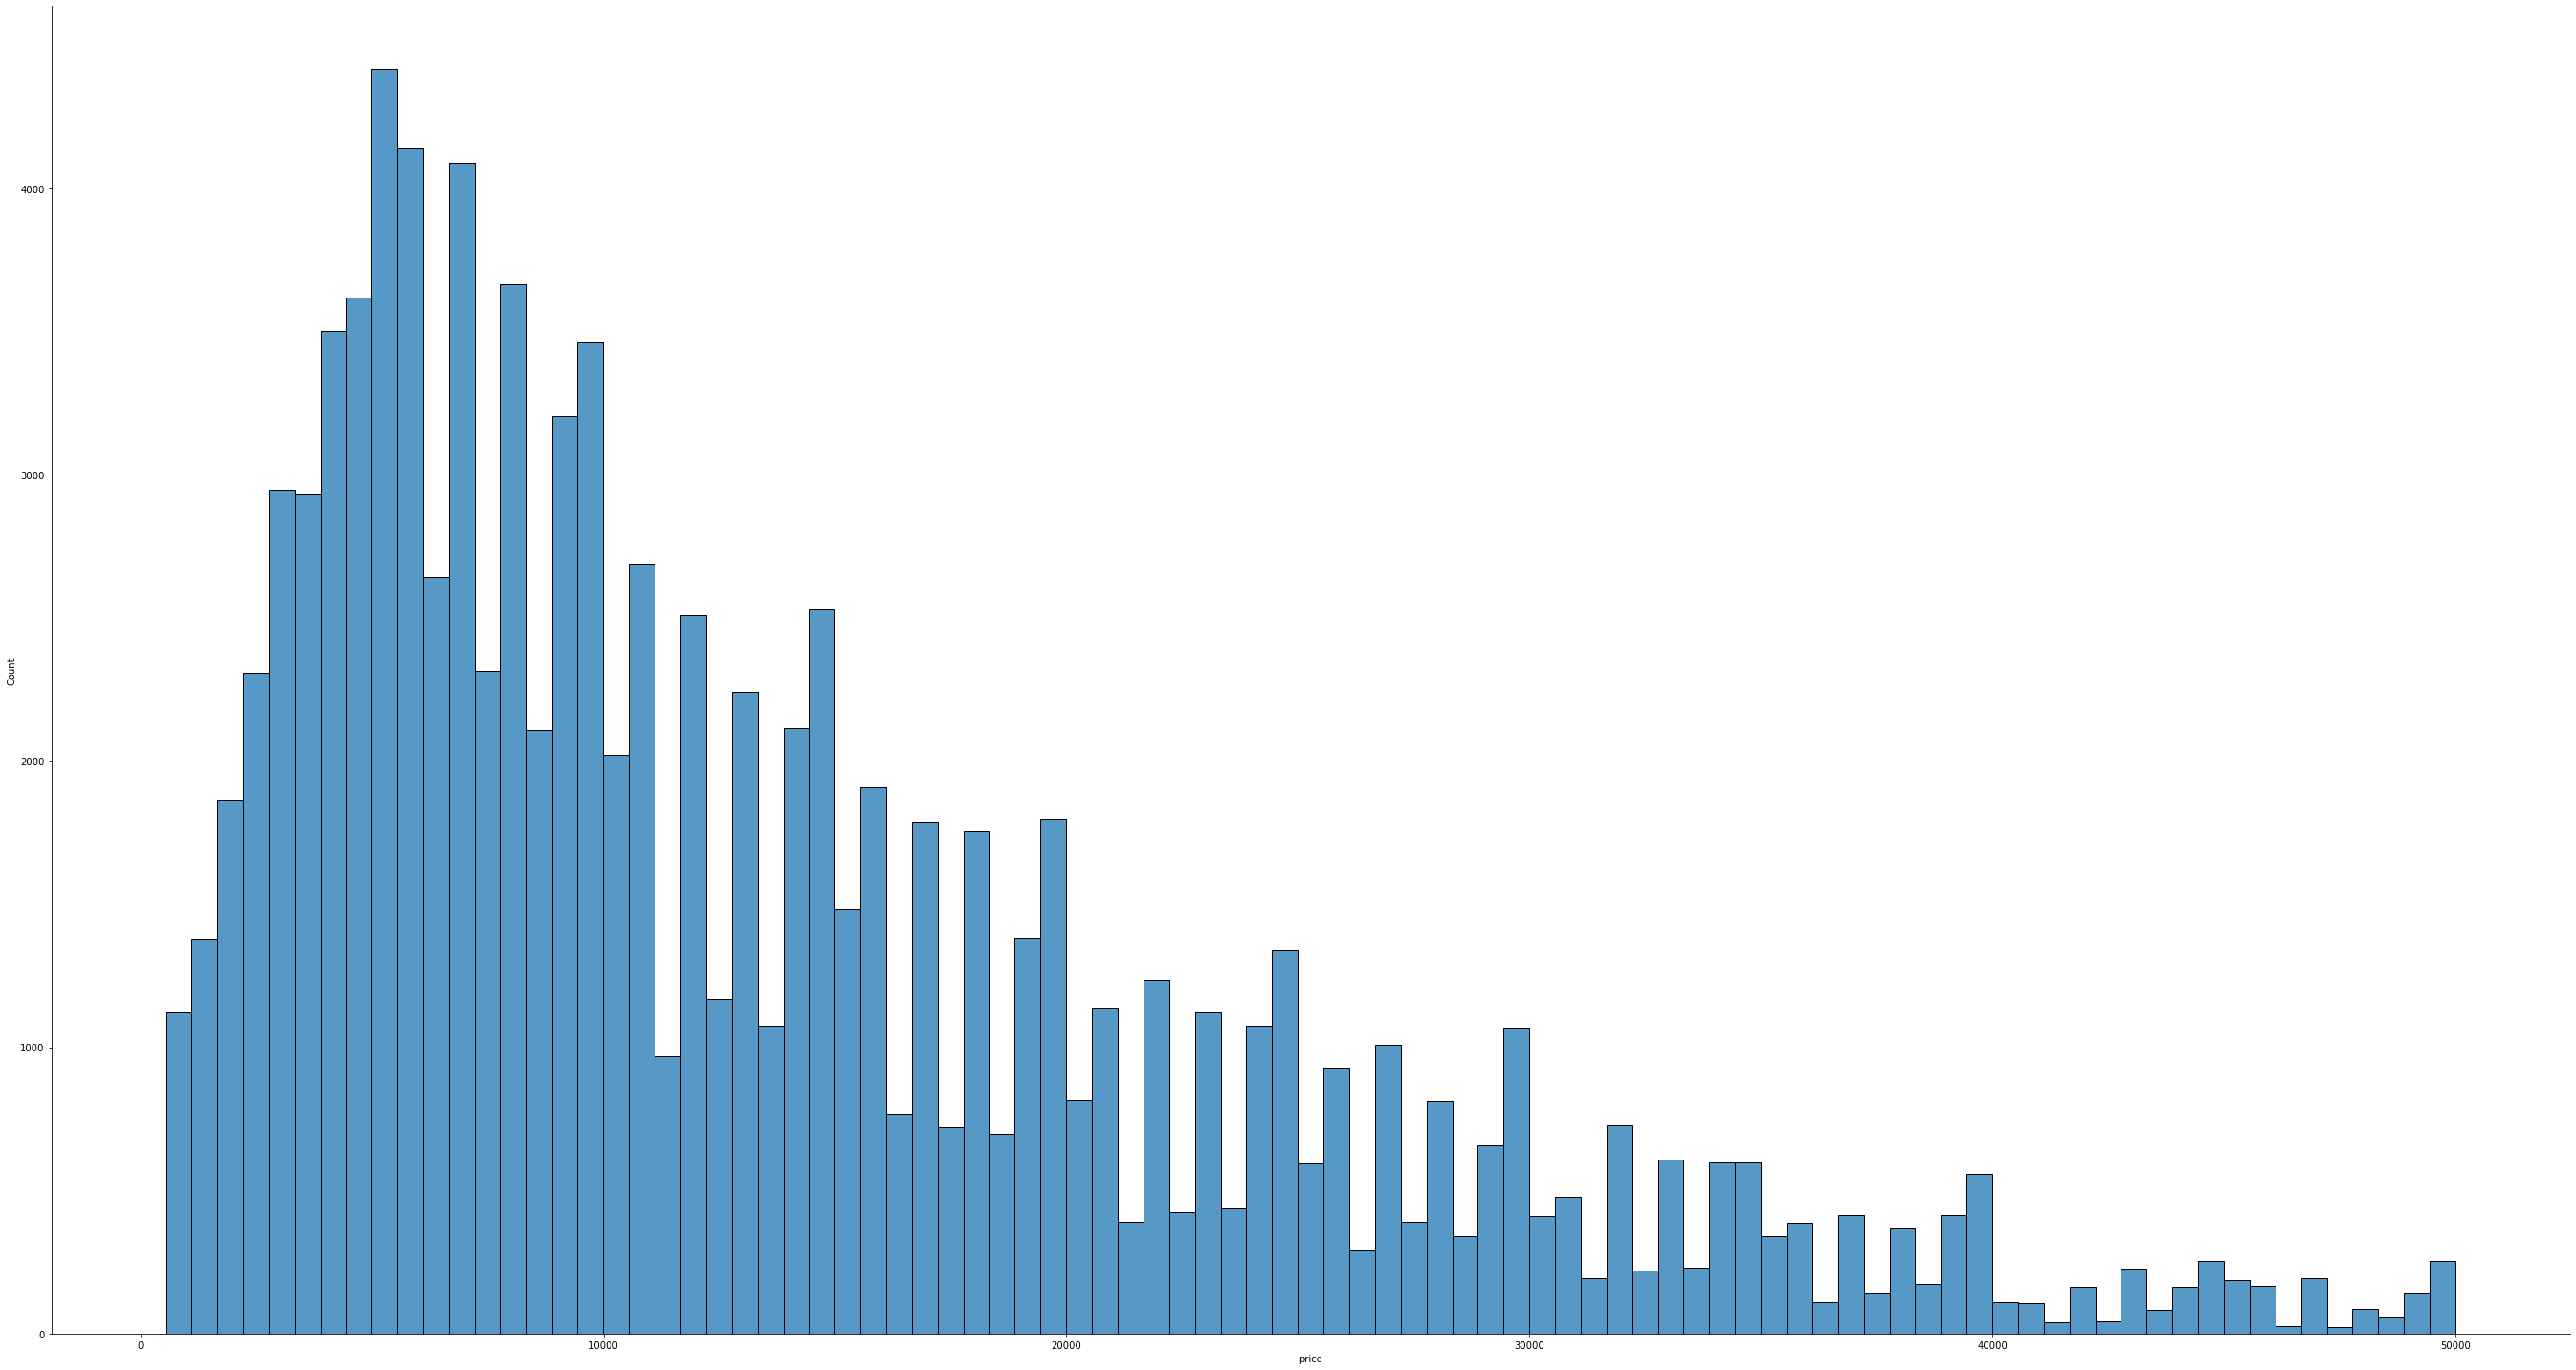

In [34]:
sns.displot(x= df1['price'], kde=False , height=20, aspect=15/8)

# Observing the distribution of the target variable, we can already see the presence of outliers. This problem will be addressed later.

In [35]:
cat_attributes.apply( lambda x: x.unique().shape[0] )


region          404
manufacturer     47
condition         6
cylinders         8
fuel              5
title_status      7
transmission      3
drive             3
size              4
type             13
paint_color      13
state            51
dtype: int64

<AxesSubplot:xlabel='state', ylabel='price'>

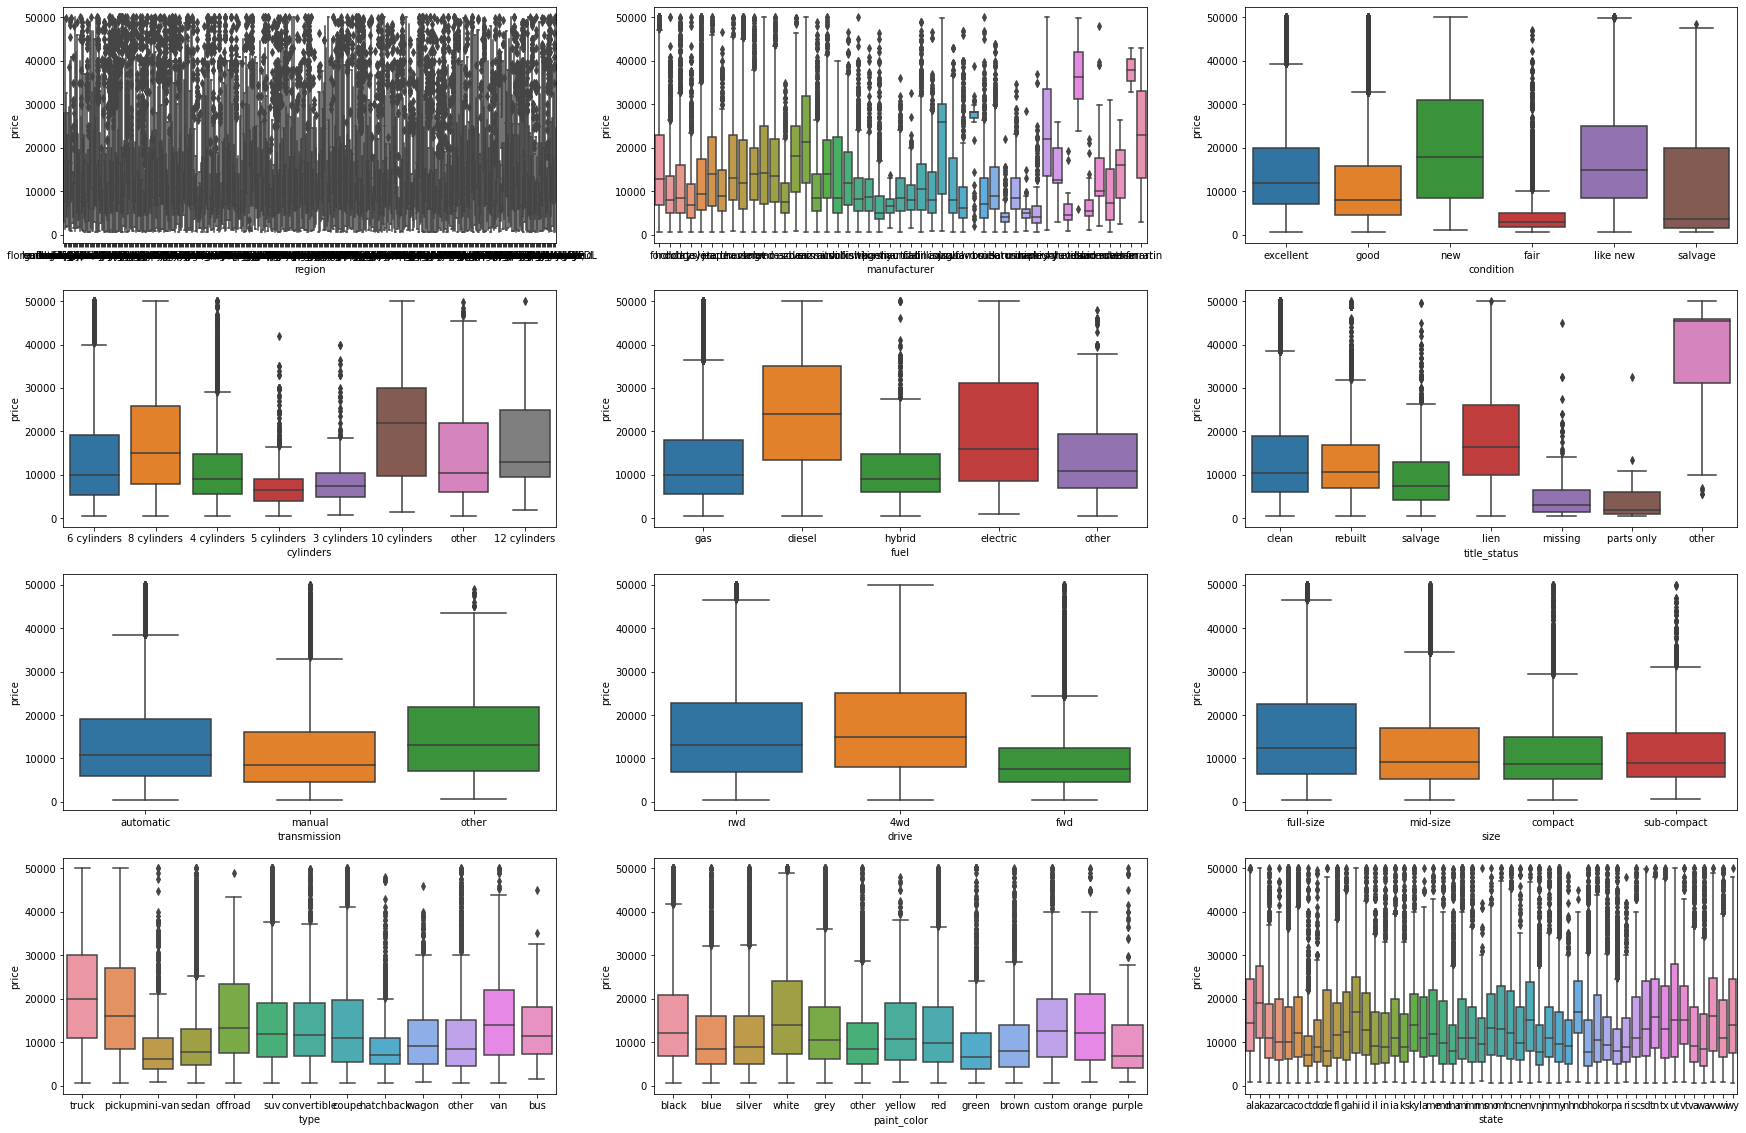

In [36]:
aux1 = df1[ df1['price'] > 0 ]

plt.rcParams["figure.figsize"] = (30,20)

plt.subplot(4, 3, 1)
sns.boxplot( x= 'region', y='price' , data=aux1 )

plt.subplot(4, 3, 2)
sns.boxplot( x= 'manufacturer', y='price' , data=aux1 )

plt.subplot(4, 3, 3)
sns.boxplot( x= 'condition', y='price' , data=aux1 )

plt.subplot(4, 3, 4)
sns.boxplot( x= 'cylinders', y='price' , data=aux1 )

plt.subplot(4, 3, 5)
sns.boxplot( x= 'fuel', y='price' , data=aux1 )

plt.subplot(4, 3, 6)
sns.boxplot( x= 'title_status', y='price' , data=aux1 )

plt.subplot(4, 3, 7)
sns.boxplot( x= 'transmission', y='price' , data=aux1 )

plt.subplot(4, 3, 8)
sns.boxplot( x= 'drive', y='price' , data=aux1 )

plt.subplot(4, 3, 9)
sns.boxplot( x= 'size', y='price' , data=aux1 )

plt.subplot(4, 3, 10)
sns.boxplot( x= 'type', y='price' , data=aux1 )

plt.subplot(4, 3, 11)
sns.boxplot( x= 'paint_color', y='price' , data=aux1 )

plt.subplot(4, 3, 12)
sns.boxplot( x= 'state', y='price' , data=aux1 )

# The same thing observed in the numerical data can be found in the ategorical data as well: The strong presence of outliers in the dataset. 
# It is even difficult to visualize the distribution of categorical variables.

In [37]:
df1['state'].unique()

array(['al', 'ak', 'az', 'ar', 'ca', 'co', 'ct', 'dc', 'de', 'fl', 'ga',
       'hi', 'id', 'il', 'in', 'ia', 'ks', 'ky', 'la', 'me', 'md', 'ma',
       'mi', 'mn', 'ms', 'mo', 'mt', 'nc', 'ne', 'nv', 'nj', 'nm', 'ny',
       'nh', 'nd', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx',
       'ut', 'vt', 'va', 'wa', 'wv', 'wi', 'wy'], dtype=object)

In [38]:
# region
# Create a new column named "region" which included the regions of USA, such as: northeast, midwest, south and west
# Northeast: ct, me, ma, nh, ri, vt, nj, ny, and pa
# Midwest: il, in, mi, oh, wi, ia, ks, mn, mo, ne, nd, and sd
# South: de, fl, ga, md, nc, sc, va, dc, wv, al, ky, ms, tn, ar, la, ok, and tx
# West: az, co, id, mt, nv, nm, ut, wy, ak, ca, hi, or, and wa

df1['region'] = df1['state'].replace( {"ct": "northeast", "me": "northeast", "ma": "northeast", "nh": "northeast", "ri": "northeast", "vt": "northeast", "nj": "northeast", "ny": "northeast", "pa": "northeast", "il": "midwest", 
                                       "in": "midwest", "mi": "midwest", "oh": "midwest", "wi": "midwest", "ia": "midwest", "ks": "midwest", "mn": "midwest", "mo": "midwest", "ne": "midwest", "nd": "midwest", "sd": "midwest",
                                       "de":"south", "fl":"south", "ga":"south", "md":"south", "nc":"south", "sc":"south", "va":"south", "dc":"south", "wv":"south", "al":"south", "ky":"south", "ms":"south", "tn":"south", 
                                       "ar":"south", "la":"south", "ok":"south", "tx":"south", "az":"west", "co":"west", "id":"west", "mt":"west", "nv":"west", "nm":"west", "ut":"west", "wy":"west", "ak":"west", "ca":"west",
                                       "hi":"west", "or":"west", "wa":"west"} )

df1['region'].unique()


array(['south', 'west', 'northeast', 'midwest'], dtype=object)

In [39]:
df1.sample(10)

,region,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
66668,west,6975,2014,kia,excellent,4 cylinders,gas,128000.0,clean,automatic,fwd,mid-size,sedan,grey,ca
89367,south,7490,2004,lexus,excellent,8 cylinders,gas,214854.0,clean,automatic,fwd,full-size,sedan,blue,dc
3253,south,11500,2012,nissan,like new,8 cylinders,gas,150000.0,rebuilt,automatic,rwd,full-size,suv,silver,al
308084,south,10200,2016,toyota,excellent,4 cylinders,gas,29160.0,clean,automatic,fwd,compact,hatchback,silver,ok
262615,west,4500,2009,kia,excellent,4 cylinders,gas,94000.0,clean,automatic,fwd,full-size,sedan,white,nm
181808,south,3000,2011,chevrolet,fair,6 cylinders,gas,120000.0,clean,manual,4wd,full-size,suv,black,md
140726,midwest,10995,2016,ford,good,4 cylinders,gas,51914.0,clean,automatic,fwd,mid-size,sedan,blue,il
321494,west,10990,2013,ford,excellent,3 cylinders,other,54511.0,clean,automatic,fwd,compact,sedan,blue,or
376745,south,6995,2009,nissan,good,4 cylinders,gas,124311.0,clean,automatic,fwd,full-size,suv,silver,tx
4381,south,40900,2021,toyota,good,6 cylinders,gas,1582.0,clean,automatic,4wd,full-size,truck,silver,al


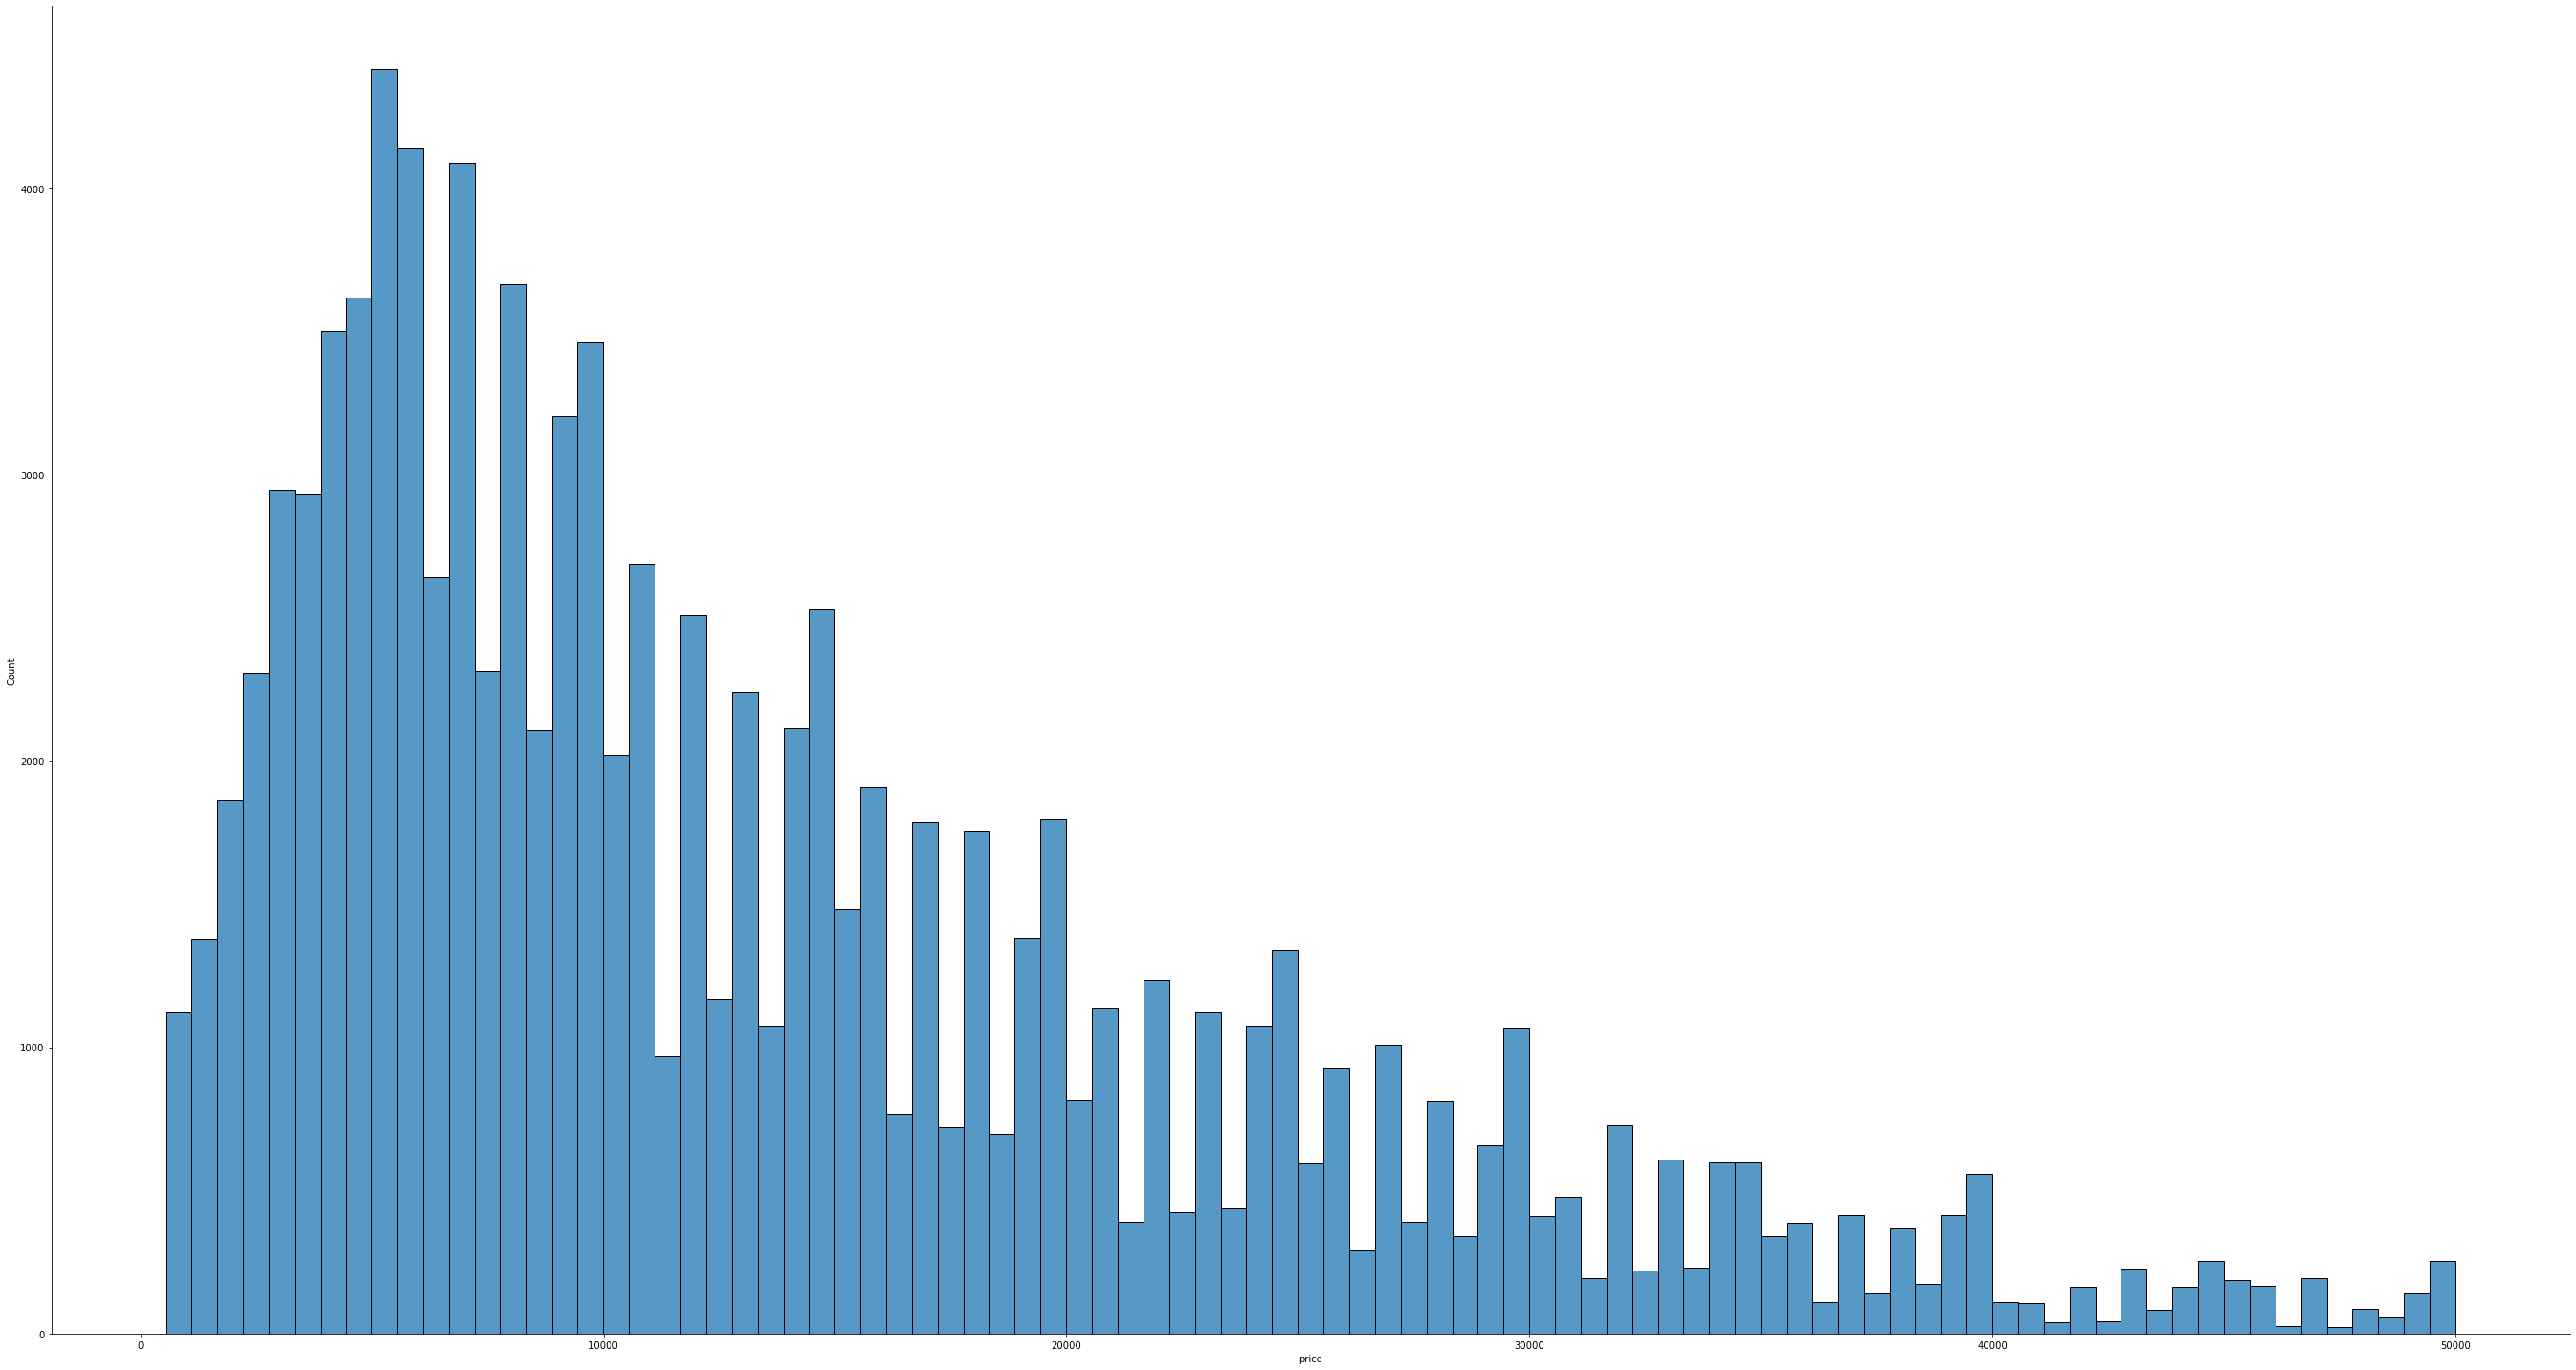

In [40]:
sns.displot( df1['price'], kde=False , height=20, aspect=15/8)



In [41]:
# As we can see above, the dataset has a lot of outliers.
# Now, I will drop the outliers using the formula below:
# Q1 - 1.5*IQR to inferior limit
# Q3 + 1.5*IQR to superior limit
df2 = df1.copy()

Q1 = np.quantile(df1['price'],0.25)
Q3 = np.quantile(df1['price'],0.75)
IQR = Q3 - Q1

inferior_limit = Q1 - 1.5*IQR
superior_limit = Q3 + 1.5*IQR

df2 = df1[(df1['price']>inferior_limit) & (df1['price']<superior_limit)]
df2 = df1[(df1['price']!=0) | (df1['odometer']!=0)]

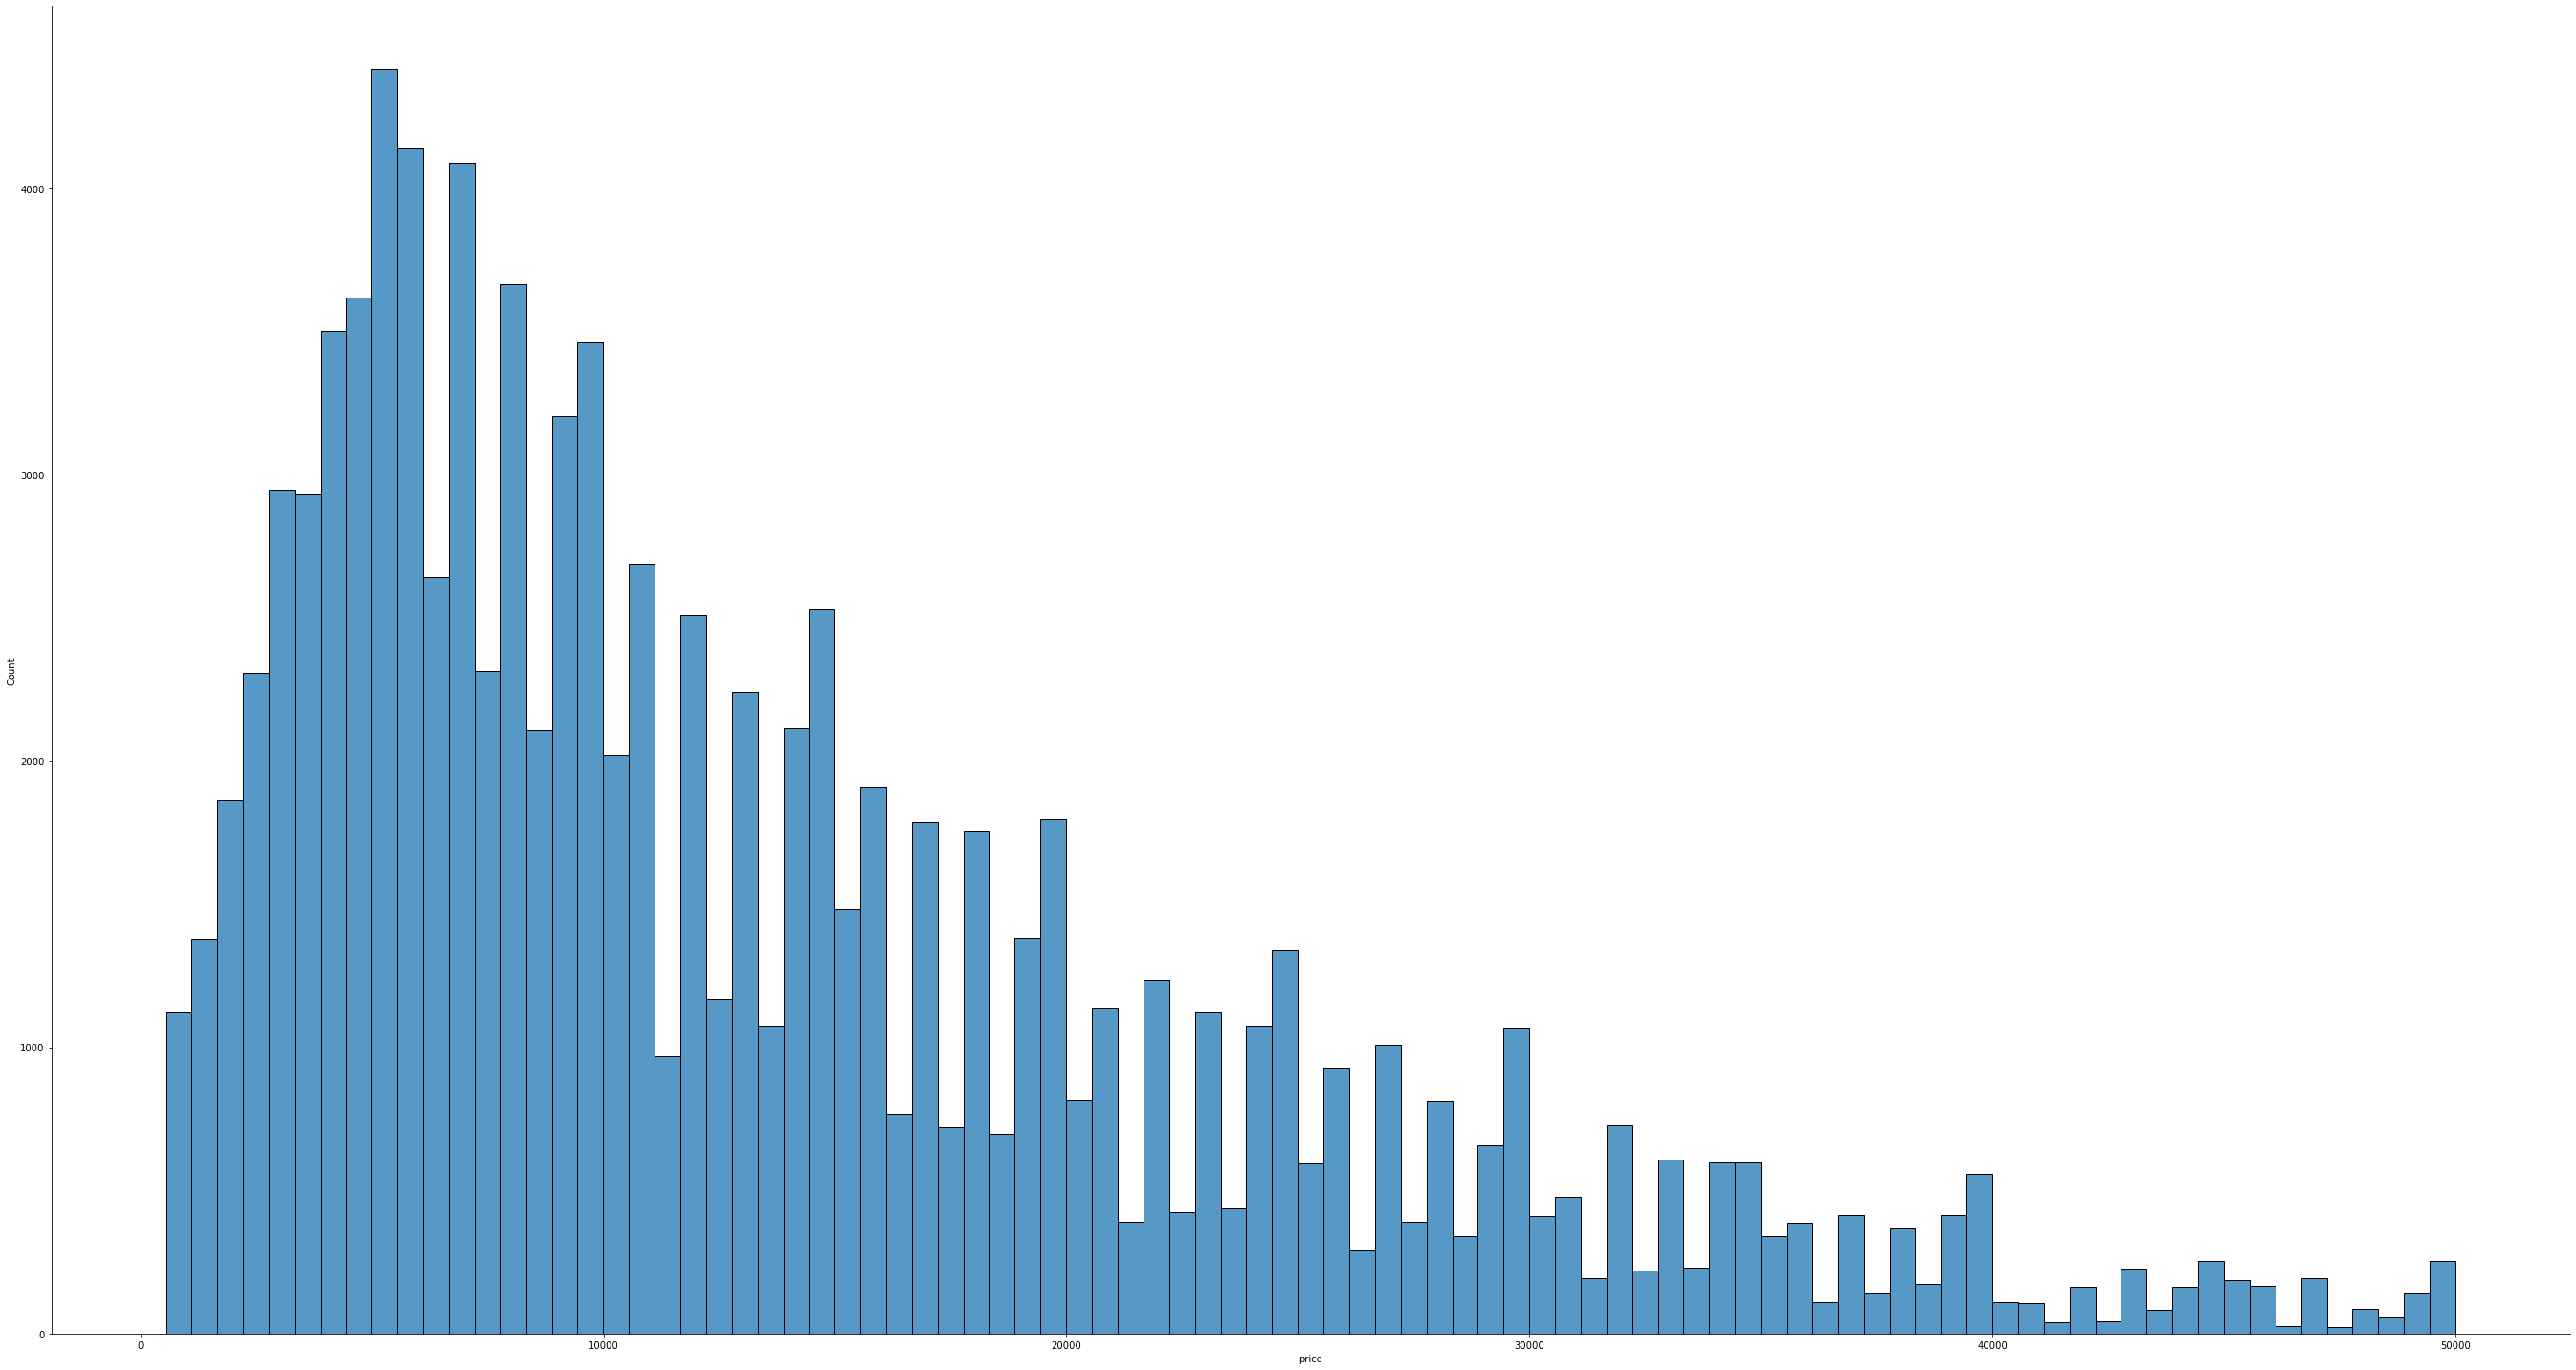

In [42]:
sns.displot( df2['price'], kde=False , height=20, aspect=15/8)


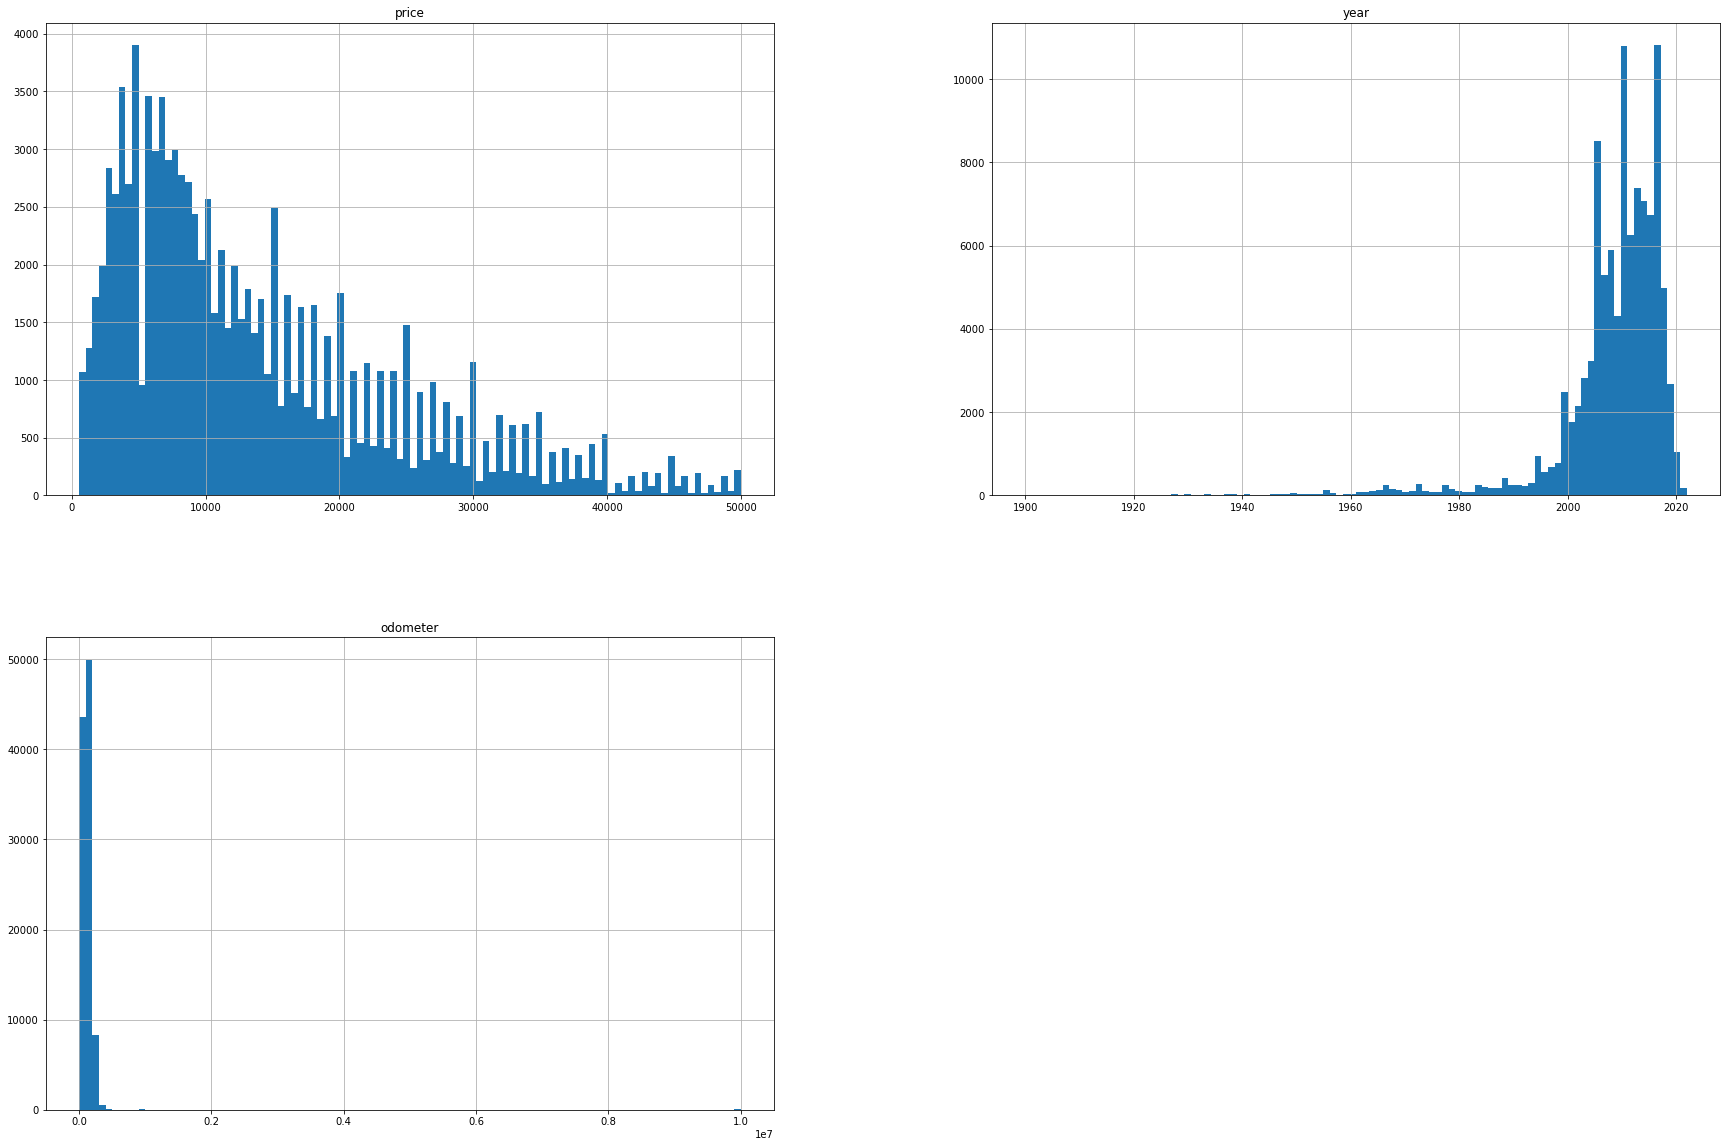

In [43]:
# After the Feature Engineering let's reset the numerical attributes.

num_attributes = df2.select_dtypes( include=['int64', 'float64'] )
num_attributes.hist( bins=100 );

In [44]:
# After the Feature Engineering let's reset the categorical attributes.

cat_attributes = df2.select_dtypes( exclude=['int64', 'float64'] )
cat_attributes.head()

,region,manufacturer,condition,cylinders,fuel,title_status,transmission,drive,size,type,paint_color,state
31,south,ford,excellent,6 cylinders,gas,clean,automatic,rwd,full-size,truck,black,al
55,south,ford,good,8 cylinders,diesel,clean,automatic,4wd,full-size,pickup,blue,al
59,south,honda,excellent,6 cylinders,gas,clean,automatic,fwd,full-size,mini-van,silver,al
65,south,ford,good,8 cylinders,diesel,clean,manual,rwd,full-size,truck,white,al
73,south,dodge,excellent,8 cylinders,gas,rebuilt,automatic,rwd,mid-size,sedan,grey,al


In [45]:
df2['region'].drop_duplicates()

31            south
4987           west
82873     northeast
139426      midwest
Name: region, dtype: object

In [46]:
df2['manufacturer'].drop_duplicates()


31                   ford
59                  honda
73                  dodge
86               chrysler
119                toyota
138                  jeep
160                 acura
183                 lexus
213             chevrolet
219                   bmw
222                   gmc
245         mercedes-benz
268                 mazda
308                 rover
329                   ram
343                nissan
366                  audi
370            mitsubishi
415              infiniti
432            volkswagen
440                   kia
458               pontiac
494                 smart
540               hyundai
544                  fiat
595              cadillac
644               lincoln
787                 isuzu
984                jaguar
1096                volvo
1151           alfa-romeo
1419                buick
1476               subaru
1741               saturn
1879                 mini
2018               suzuki
4061              mercury
5215              porsche
5988      ha

In [47]:
df2['condition'].drop_duplicates()

31      excellent
55           good
186           new
219          fair
270      like new
3326      salvage
Name: condition, dtype: object

In [48]:
df2['cylinders'].drop_duplicates()


31        6 cylinders
55        8 cylinders
215       4 cylinders
432       5 cylinders
494       3 cylinders
783      10 cylinders
3843            other
15033    12 cylinders
Name: cylinders, dtype: object

In [49]:
df2['fuel'].drop_duplicates()


31           gas
55        diesel
373       hybrid
3620    electric
5905       other
Name: fuel, dtype: object

In [50]:
df2['title_status'].drop_duplicates()


31            clean
73          rebuilt
491         salvage
1240           lien
1391        missing
4213     parts only
42581         other
Name: title_status, dtype: object

In [51]:
df2['transmission'].drop_duplicates()


31     automatic
65        manual
989        other
Name: transmission, dtype: object

In [52]:
df2['drive'].drop_duplicates()


31    rwd
55    4wd
59    fwd
Name: drive, dtype: object

In [53]:
df2['type'].drop_duplicates()


31            truck
55           pickup
59         mini-van
73            sedan
119         offroad
138             suv
186     convertible
264           coupe
270       hatchback
373           wagon
458           other
735             van
8001            bus
Name: type, dtype: object

In [54]:
df2['paint_color'].drop_duplicates()


31       black
55        blue
59      silver
65       white
73        grey
184      other
186     yellow
193        red
228      green
343      brown
1234    custom
1476    orange
6650    purple
Name: paint_color, dtype: object

In [55]:
df2['state'].drop_duplicates()


31        al
4987      ak
8456      az
17139     ar
21174     ca
71786     co
82873     ct
88063     dc
91031     de
91980     fl
120492    ga
127493    hi
130461    id
139426    il
149819    in
155509    ia
164142    ks
170350    ky
174530    la
177697    me
180661    md
185440    ma
193613    mi
210513    mn
218229    ms
219244    mo
223537    mt
229831    nc
245113    ne
246147    nv
249338    nj
259082    nm
263504    ny
282888    nh
285869    nd
286286    oh
303974    ok
310766    or
327869    pa
341621    ri
343943    sc
350268    sd
351570    tn
362637    tx
385589    ut
386728    vt
389239    va
399971    wa
413823    wv
414873    wi
426273    wy
Name: state, dtype: object

In [56]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102688 entries, 31 to 426833
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        102688 non-null  object 
 1   price         102688 non-null  int64  
 2   year          102688 non-null  int64  
 3   manufacturer  102688 non-null  object 
 4   condition     102688 non-null  object 
 5   cylinders     102688 non-null  object 
 6   fuel          102688 non-null  object 
 7   odometer      102688 non-null  float64
 8   title_status  102688 non-null  object 
 9   transmission  102688 non-null  object 
 10  drive         102688 non-null  object 
 11  size          102688 non-null  object 
 12  type          102688 non-null  object 
 13  paint_color   102688 non-null  object 
 14  state         102688 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 12.5+ MB


/Users/akashtc/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/akashtc/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/akashtc/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price', ylabel='Density'>

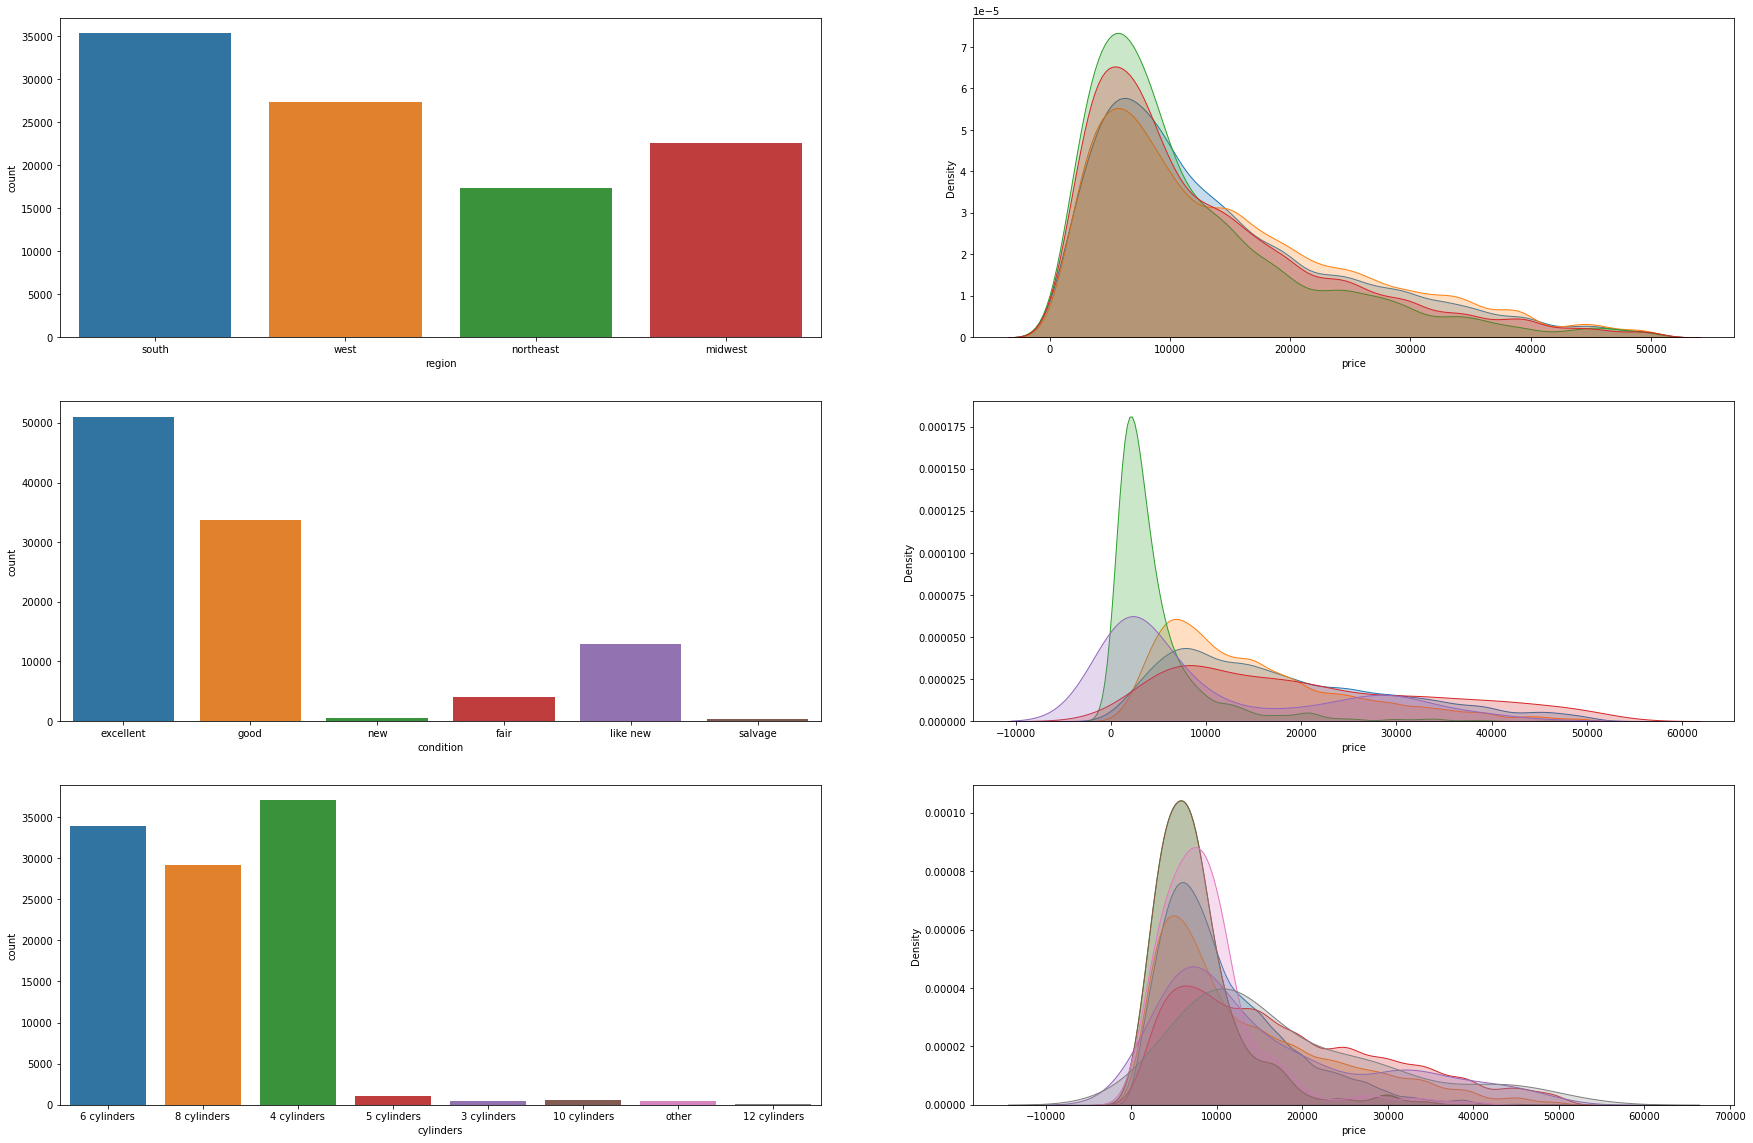

In [57]:
#region

plt.subplot( 3, 2, 1)
sns.countplot( df2['region'] )

plt.subplot( 3, 2, 2)
sns.kdeplot( df2[df2['region'] == 'west']['price'], label='west', shade=True )
sns.kdeplot( df2[df2['region'] == 'south']['price'], label='south', shade=True )
sns.kdeplot( df2[df2['region'] == 'northeast']['price'], label='northeast', shade=True )
sns.kdeplot( df2[df2['region'] == 'midwest']['price'], label='midwest', shade=True )

# condition

plt.subplot( 3, 2, 3)
sns.countplot( df2['condition'] )

plt.subplot( 3, 2, 4)
sns.kdeplot( df2[df2['condition'] == 'like new']['price'], label='like new', shade=True )
sns.kdeplot( df2[df2['condition'] == 'excellent']['price'], label='excellent', shade=True )
sns.kdeplot( df2[df2['condition'] == 'unknown']['price'], label='unknown', shade=True )
sns.kdeplot( df2[df2['condition'] == 'fair']['price'], label='fair', shade=True )
sns.kdeplot( df2[df2['condition'] == 'new']['price'], label='new', shade=True )
sns.kdeplot( df2[df2['condition'] == 'salvage']['price'], label='salvage', shade=True )

# cylinders

plt.subplot( 3, 2, 5)
sns.countplot( df2['cylinders'] )

plt.subplot( 3, 2, 6)
sns.kdeplot( df2[df2['cylinders'] == '4 cylinders']['price'], label='4 cylinders', shade=True )
sns.kdeplot( df2[df2['cylinders'] == 'unknown']['price'], label='unknown', shade=True )
sns.kdeplot( df2[df2['cylinders'] == '6 cylinders']['price'], label='6 cylinders', shade=True )
sns.kdeplot( df2[df2['cylinders'] == '5 cylinders']['price'], label='5 cylinders', shade=True )
sns.kdeplot( df2[df2['cylinders'] == '8 cylinders']['price'], label='8 cylinders', shade=True )
sns.kdeplot( df2[df2['cylinders'] == 'other']['price'], label='other', shade=True )
sns.kdeplot( df2[df2['cylinders'] == '5 cylinders']['price'], label='5 cylinders', shade=True )
sns.kdeplot( df2[df2['cylinders'] == '3 cylinders']['price'], label='3 cylinders', shade=True )
sns.kdeplot( df2[df2['cylinders'] == '12 cylinders']['price'], label='12 cylinders', shade=True )



### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.